# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from os import system
from IPython.display import Image
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, recall_score,precision_score,f1_score,precision_recall_curve

# Exploratory Data Analysis

## Data Overview

In [2]:
df = pd.read_csv('INNHotelsGroup.csv')
df


Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0       INN00001             2               0                     1   
1       INN00002             2               0                     2   
2       INN00003             1               0                     2   
3       INN00004             2               0                     0   
4       INN00005             2               0                     1   
...          ...           ...             ...                   ...   
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                      2       Meal Plan 1                           0   
1                      3      Not Selected                           0   
2                      1       Meal Plan 1                           0   
3                      2       Meal Plan 1                           0   
4                      1      Not Selected                           0   
...                  ...               ...                         ...   
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
0            Room_Type 1        224          2017             10   
1            Room_Type 1          5          2018             11   
2            Room_Type 1          1          2018              2   
3            Room_Type 1        211          2018              5   
4            Room_Type 1         48          2018              4   
...                  ...        ...           ...            ...   
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
0                 2             Offline               0   
1                 6              Online               0   
2                28              Online               0   
3                20              Online               0   
4                11              Online               0   
...             ...                 ...             ...   
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                                 0                                     0   
1                                 0                                     0   
2                                 0                                     0   
3                                 0                                     0   
4                                 0                                     0   
...                             ...                                   ...   
36270                             0                                     0   
36271                             0                                     0   
36272                            

In [3]:
df.shape

(36275, 19)

The dataset contains 36275 rows and 19 columns.

In [4]:
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

- The data consists of  numerical columns like **number of adults, children, nights, lead time, and price**.

-  Data consists categorical columns like **type of meal plan, room type reserved, and booking status**.

- Numerical columns like **required_car_parking_space, repeated_guest, no_of_previous_cancellations, and no_of_special_requests** represent categorical information as int64 type.



In [5]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

- The majority columns in the dataset are **numericals ie('int64','float64' dtype)**.
- The dataset contains **13 int64 dtype, 1 float64 dtype, 5 objec dtype**.

In [6]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

The dataset does not have any null entries.

In [7]:
df.duplicated().sum()

np.int64(0)

The dataset does not have any duplicate entries.

## Univariate Analysis

### no_of_adults

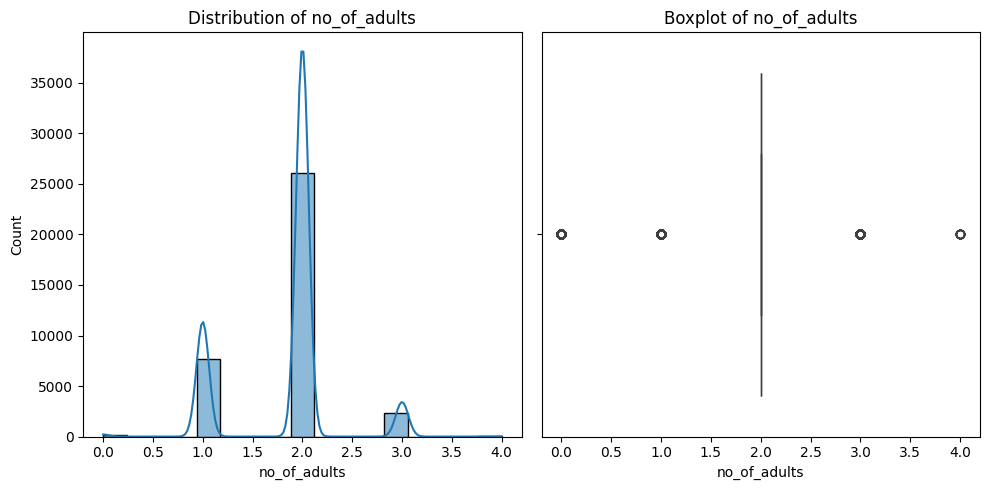

In [8]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='no_of_adults',kde=True)
plt.title('Distribution of no_of_adults')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='no_of_adults')
plt.title('Boxplot of no_of_adults')
plt.tight_layout()
plt.show()

- The number of visitors shows **right_skewed**.


### no_of_children

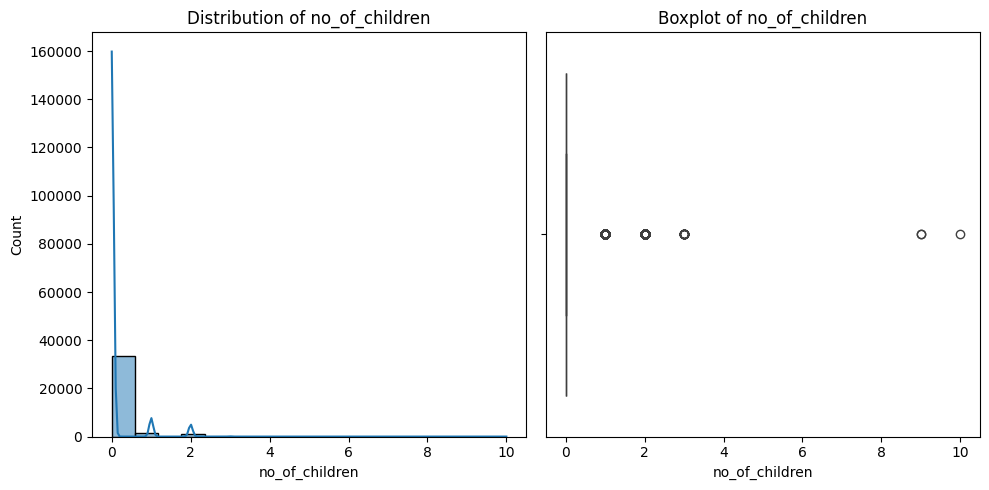

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='no_of_children',kde=True)
plt.title('Distribution of no_of_children')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='no_of_children')
plt.title('Boxplot of no_of_children')
plt.tight_layout()
plt.show()

- The number of children shows **right_skewed**.
- The maximun number of children is 10.

### no_of_weekend_nights

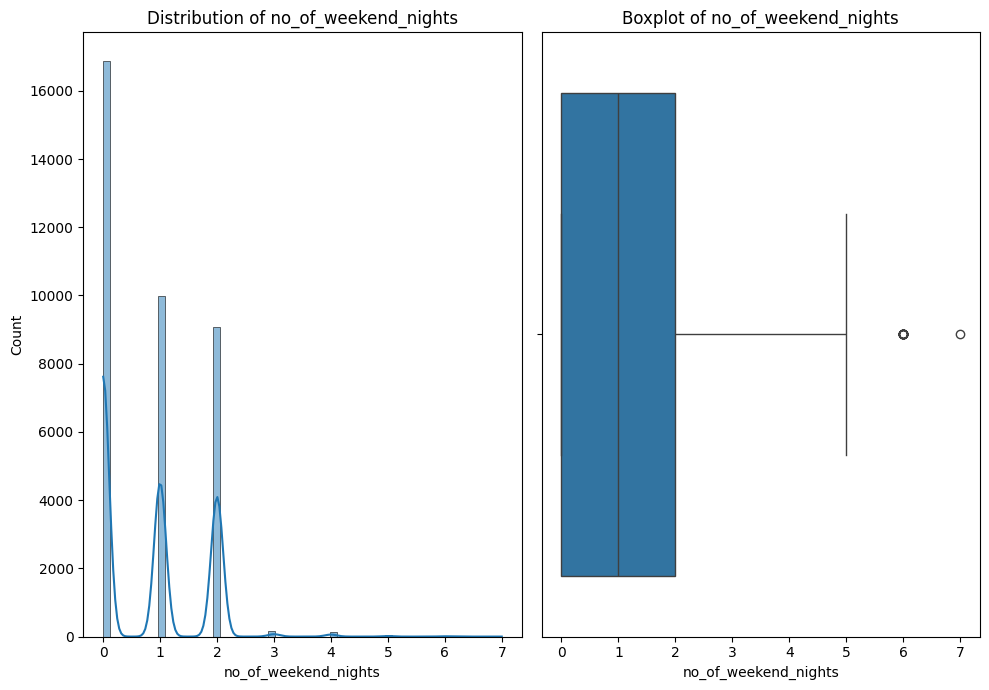

In [10]:
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.histplot(data=df,x='no_of_weekend_nights',kde=True)
plt.title('Distribution of no_of_weekend_nights')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='no_of_weekend_nights')
plt.title('Boxplot of no_of_weekend_nights')
plt.tight_layout()
plt.show()

- The distribution of No_of_weekend_nights shows right skewed.
- The median number of weekedn nights guests stayed is **1 night**.

### no_of_week_nights

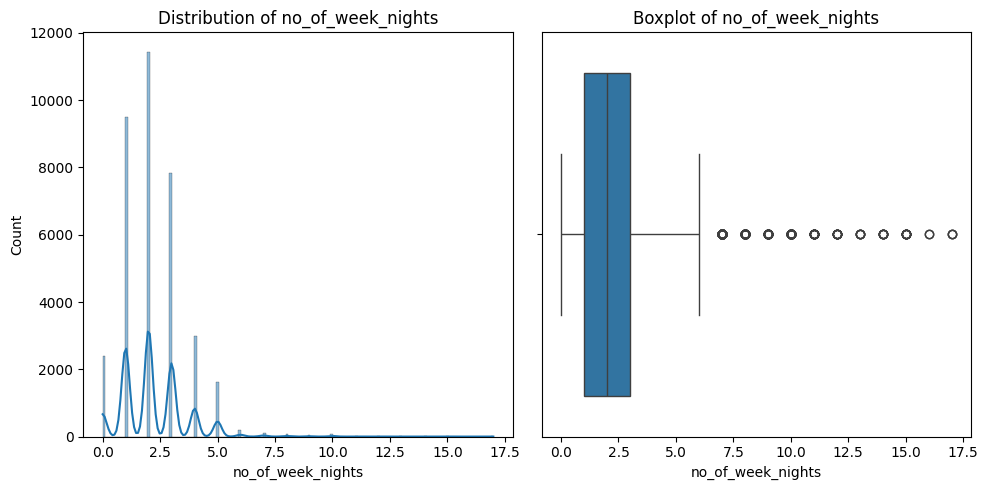

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='no_of_week_nights',kde=True)
plt.title('Distribution of no_of_week_nights')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='no_of_week_nights')
plt.title('Boxplot of no_of_week_nights')
plt.tight_layout()
plt.show()

- The distribution of **no_of_week_nights** is **right-skewed**.
- The median number of week nights guests stayed is approxilately **2 nights**.

### lead_time

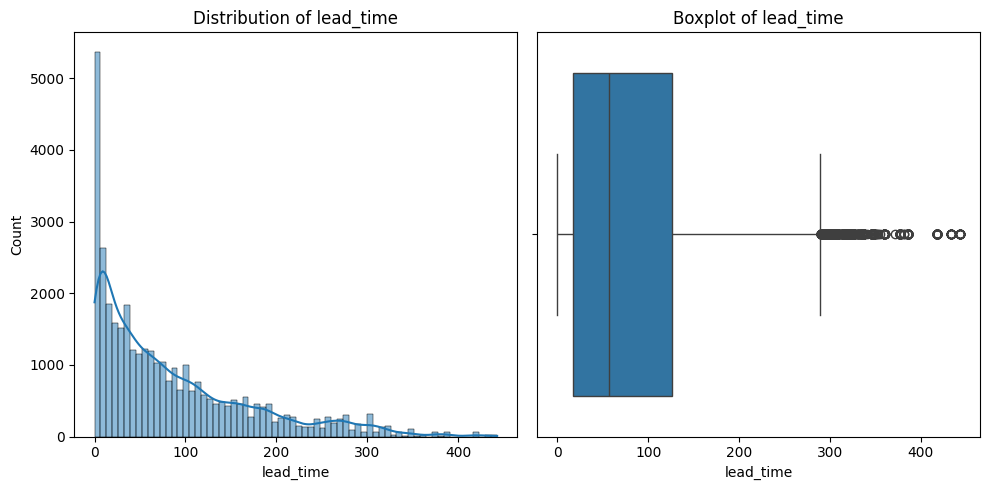

In [12]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='lead_time',kde=True)
plt.title('Distribution of lead_time')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='lead_time')
plt.title('Boxplot of lead_time')
plt.tight_layout()
plt.show()

In [13]:
df['lead_time'].median()

57.0

- The distribution of **lead_time** is **right-skewed**.
- The median number of days(lead_time) spent is approximately **57 days**.

### avg_price_per_room

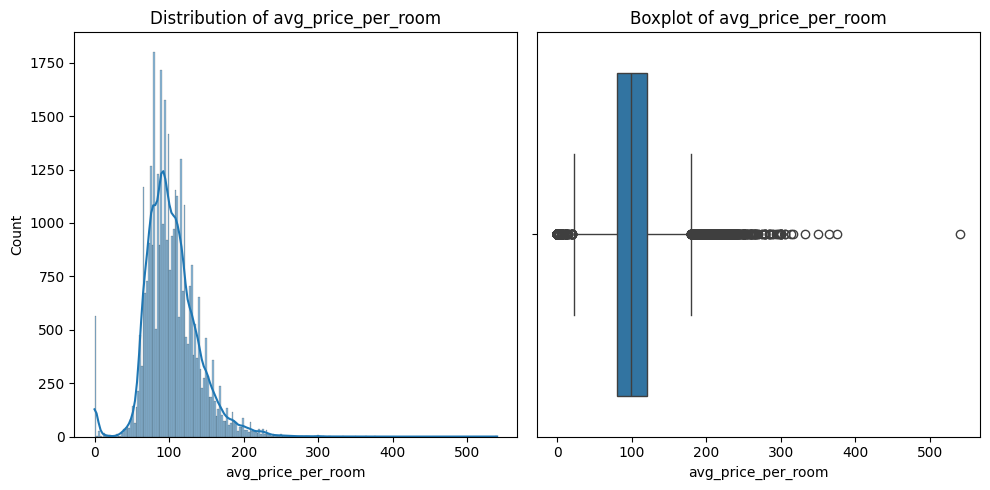

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='avg_price_per_room',kde=True)
plt.title('Distribution of avg_price_per_room')
plt.subplot(1,2,2)
sns.boxplot(data=df,x='avg_price_per_room')
plt.title('Boxplot of avg_price_per_room')
plt.tight_layout()
plt.show()

In [15]:
df['avg_price_per_room'].median()

99.45

- The distribution of **avg_prive_per_room** is **right-skewed**.

- The median price per room is approximately **100 euros**.

### type_of_meal_plan

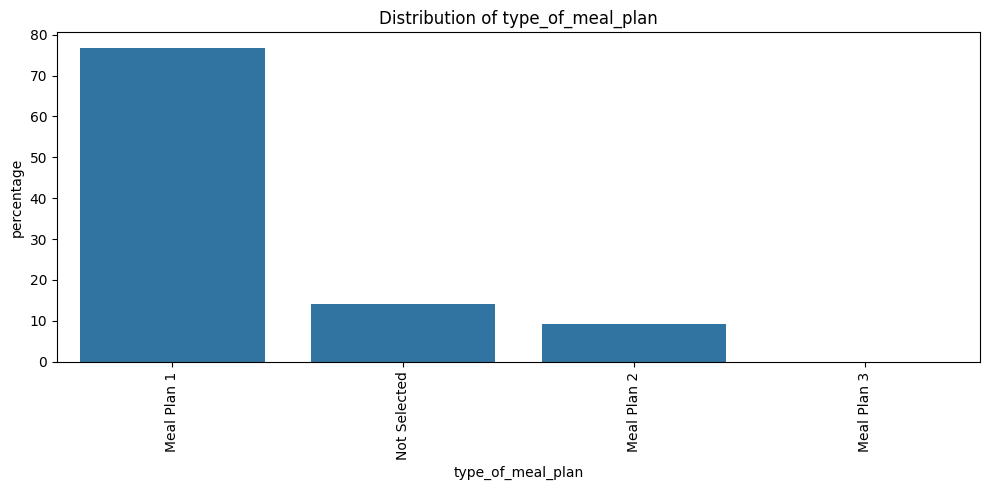

In [16]:
meal_plan_counts = df['type_of_meal_plan'].value_counts(normalize = True)*100
plt.figure(figsize=(10, 5))
sns.barplot(x=meal_plan_counts.index, y=meal_plan_counts.values)
plt.title('Distribution of type_of_meal_plan')
plt.xlabel('type_of_meal_plan')
plt.ylabel('percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [17]:
meal_plan_counts

type_of_meal_plan
Meal Plan 1     76.733287
Not Selected    14.141971
Meal Plan 2      9.110958
Meal Plan 3      0.013784
Name: proportion, dtype: float64

 - Approximately **76%** of the customers booked **Meal Plan 1**.

 - Approximately **14%** of the customers have not booked any meal plan.

 - Approximately **9%** of customers booked **Meal Plan 2**.



### room_type_reserved

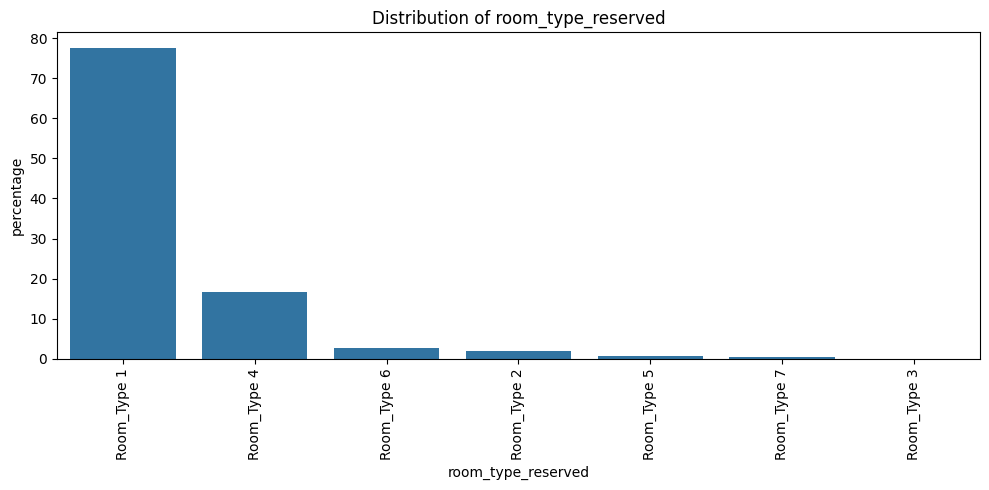

In [18]:
room_type_reserved_counts = df['room_type_reserved'].value_counts(normalize = True)*100
plt.figure(figsize=(10, 5))
sns.barplot(x=room_type_reserved_counts.index, y=room_type_reserved_counts.values)
plt.title('Distribution of room_type_reserved')
plt.xlabel('room_type_reserved')
plt.ylabel('percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [19]:
room_type_reserved_counts

room_type_reserved
Room_Type 1    77.546520
Room_Type 4    16.697450
Room_Type 6     2.662991
Room_Type 2     1.907650
Room_Type 5     0.730531
Room_Type 7     0.435562
Room_Type 3     0.019297
Name: proportion, dtype: float64

- Approximately **77.5%** of the customers booked **Room Type 1**.

- Approximately **17%** of the customers booked **Room Type 4**.

- Approximately **3%** of the customers booked **Room Type 6**.

### booking_status

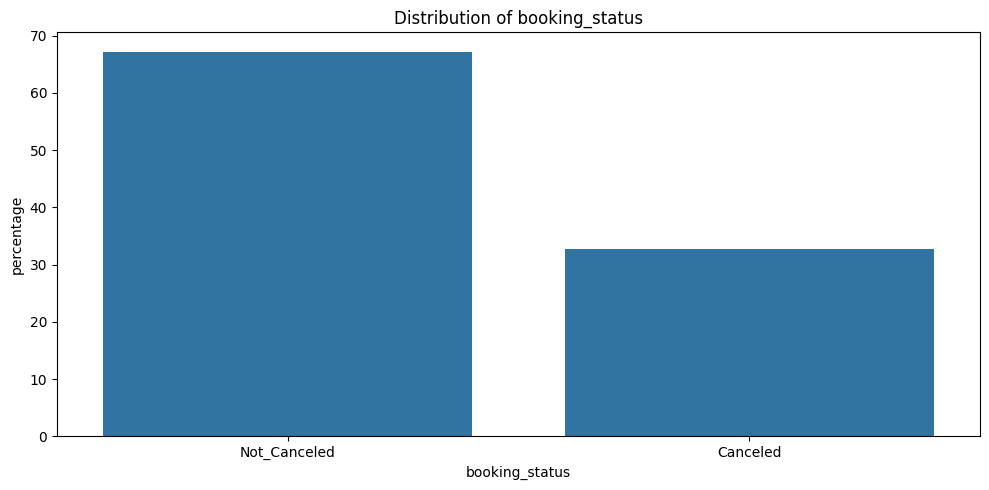

In [20]:
booking_status_counts = df['booking_status'].value_counts(normalize = True)*100
plt.figure(figsize=(10, 5))
sns.barplot(x=booking_status_counts.index, y=booking_status_counts.values)
plt.title('Distribution of booking_status')
plt.xlabel('booking_status')
plt.ylabel('percentage')

plt.tight_layout()
plt.show()

In [21]:
booking_status_counts

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64

- Approximately **67%** of the customers have **not cancelled** their booking.

- Approximately **33%** of the customers have **cancelled** their booking.

## Bivariate Analysis

### Heatmap

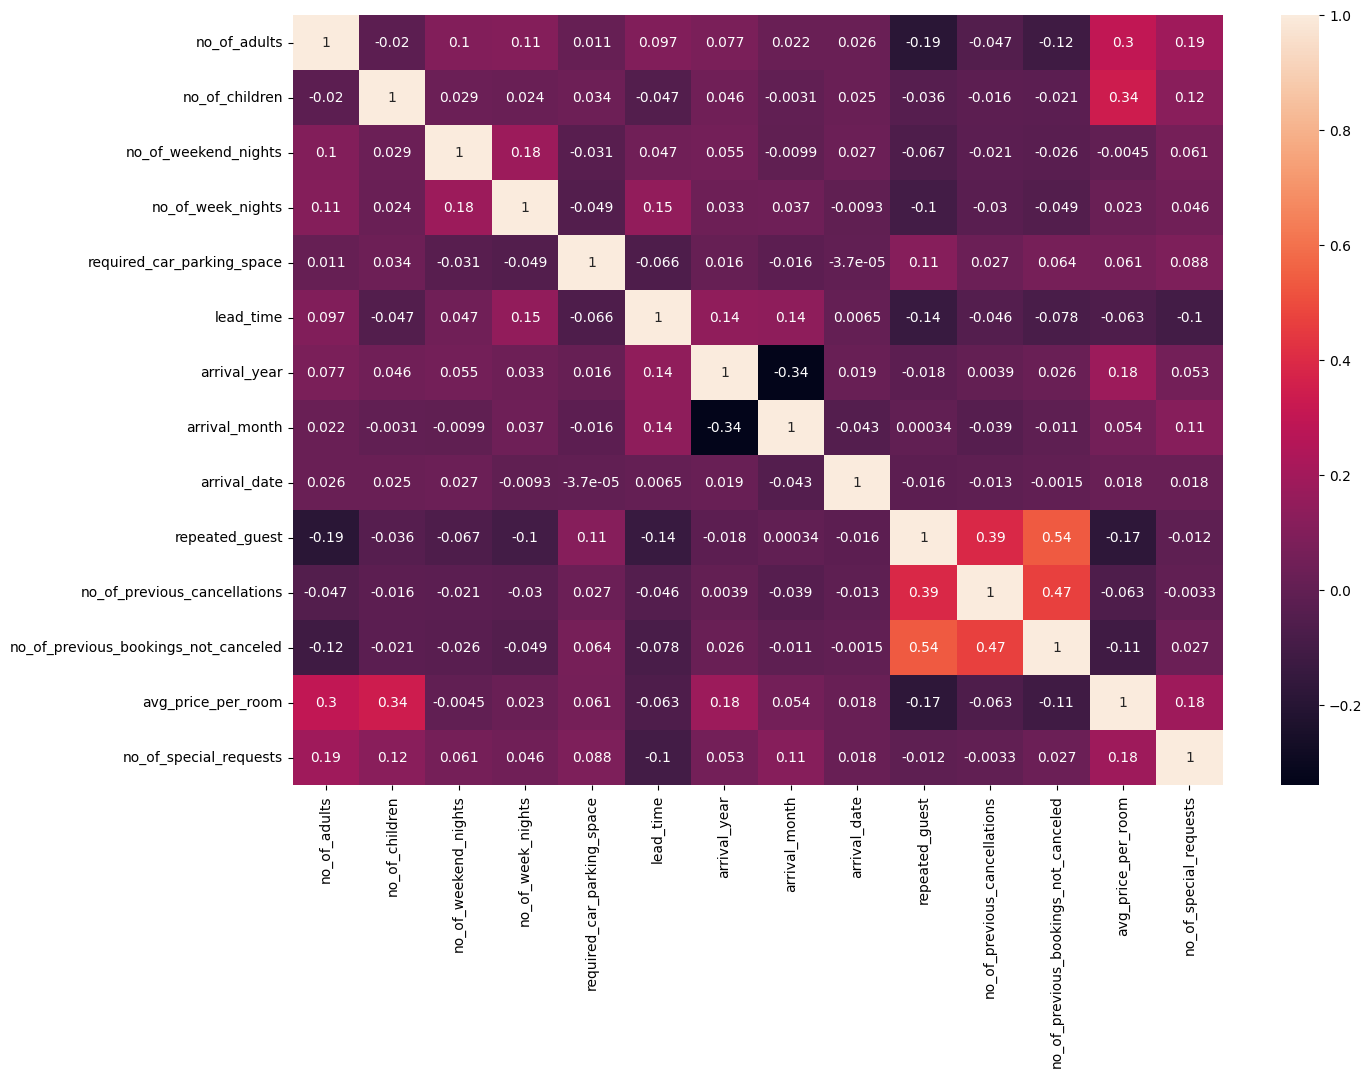

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(),annot=True)
plt.show()

- **Repeated_guest** is **highly postively correlated** with  **no_of_previous_bookings_not_canceled** with correlation value of **0.54**.

-  **Repeated_guest** is **postively correlated** with  **no_of_previous_cancellations** with correlation value of **0.39**.

### Pairplot

<Figure size 1500x700 with 0 Axes>

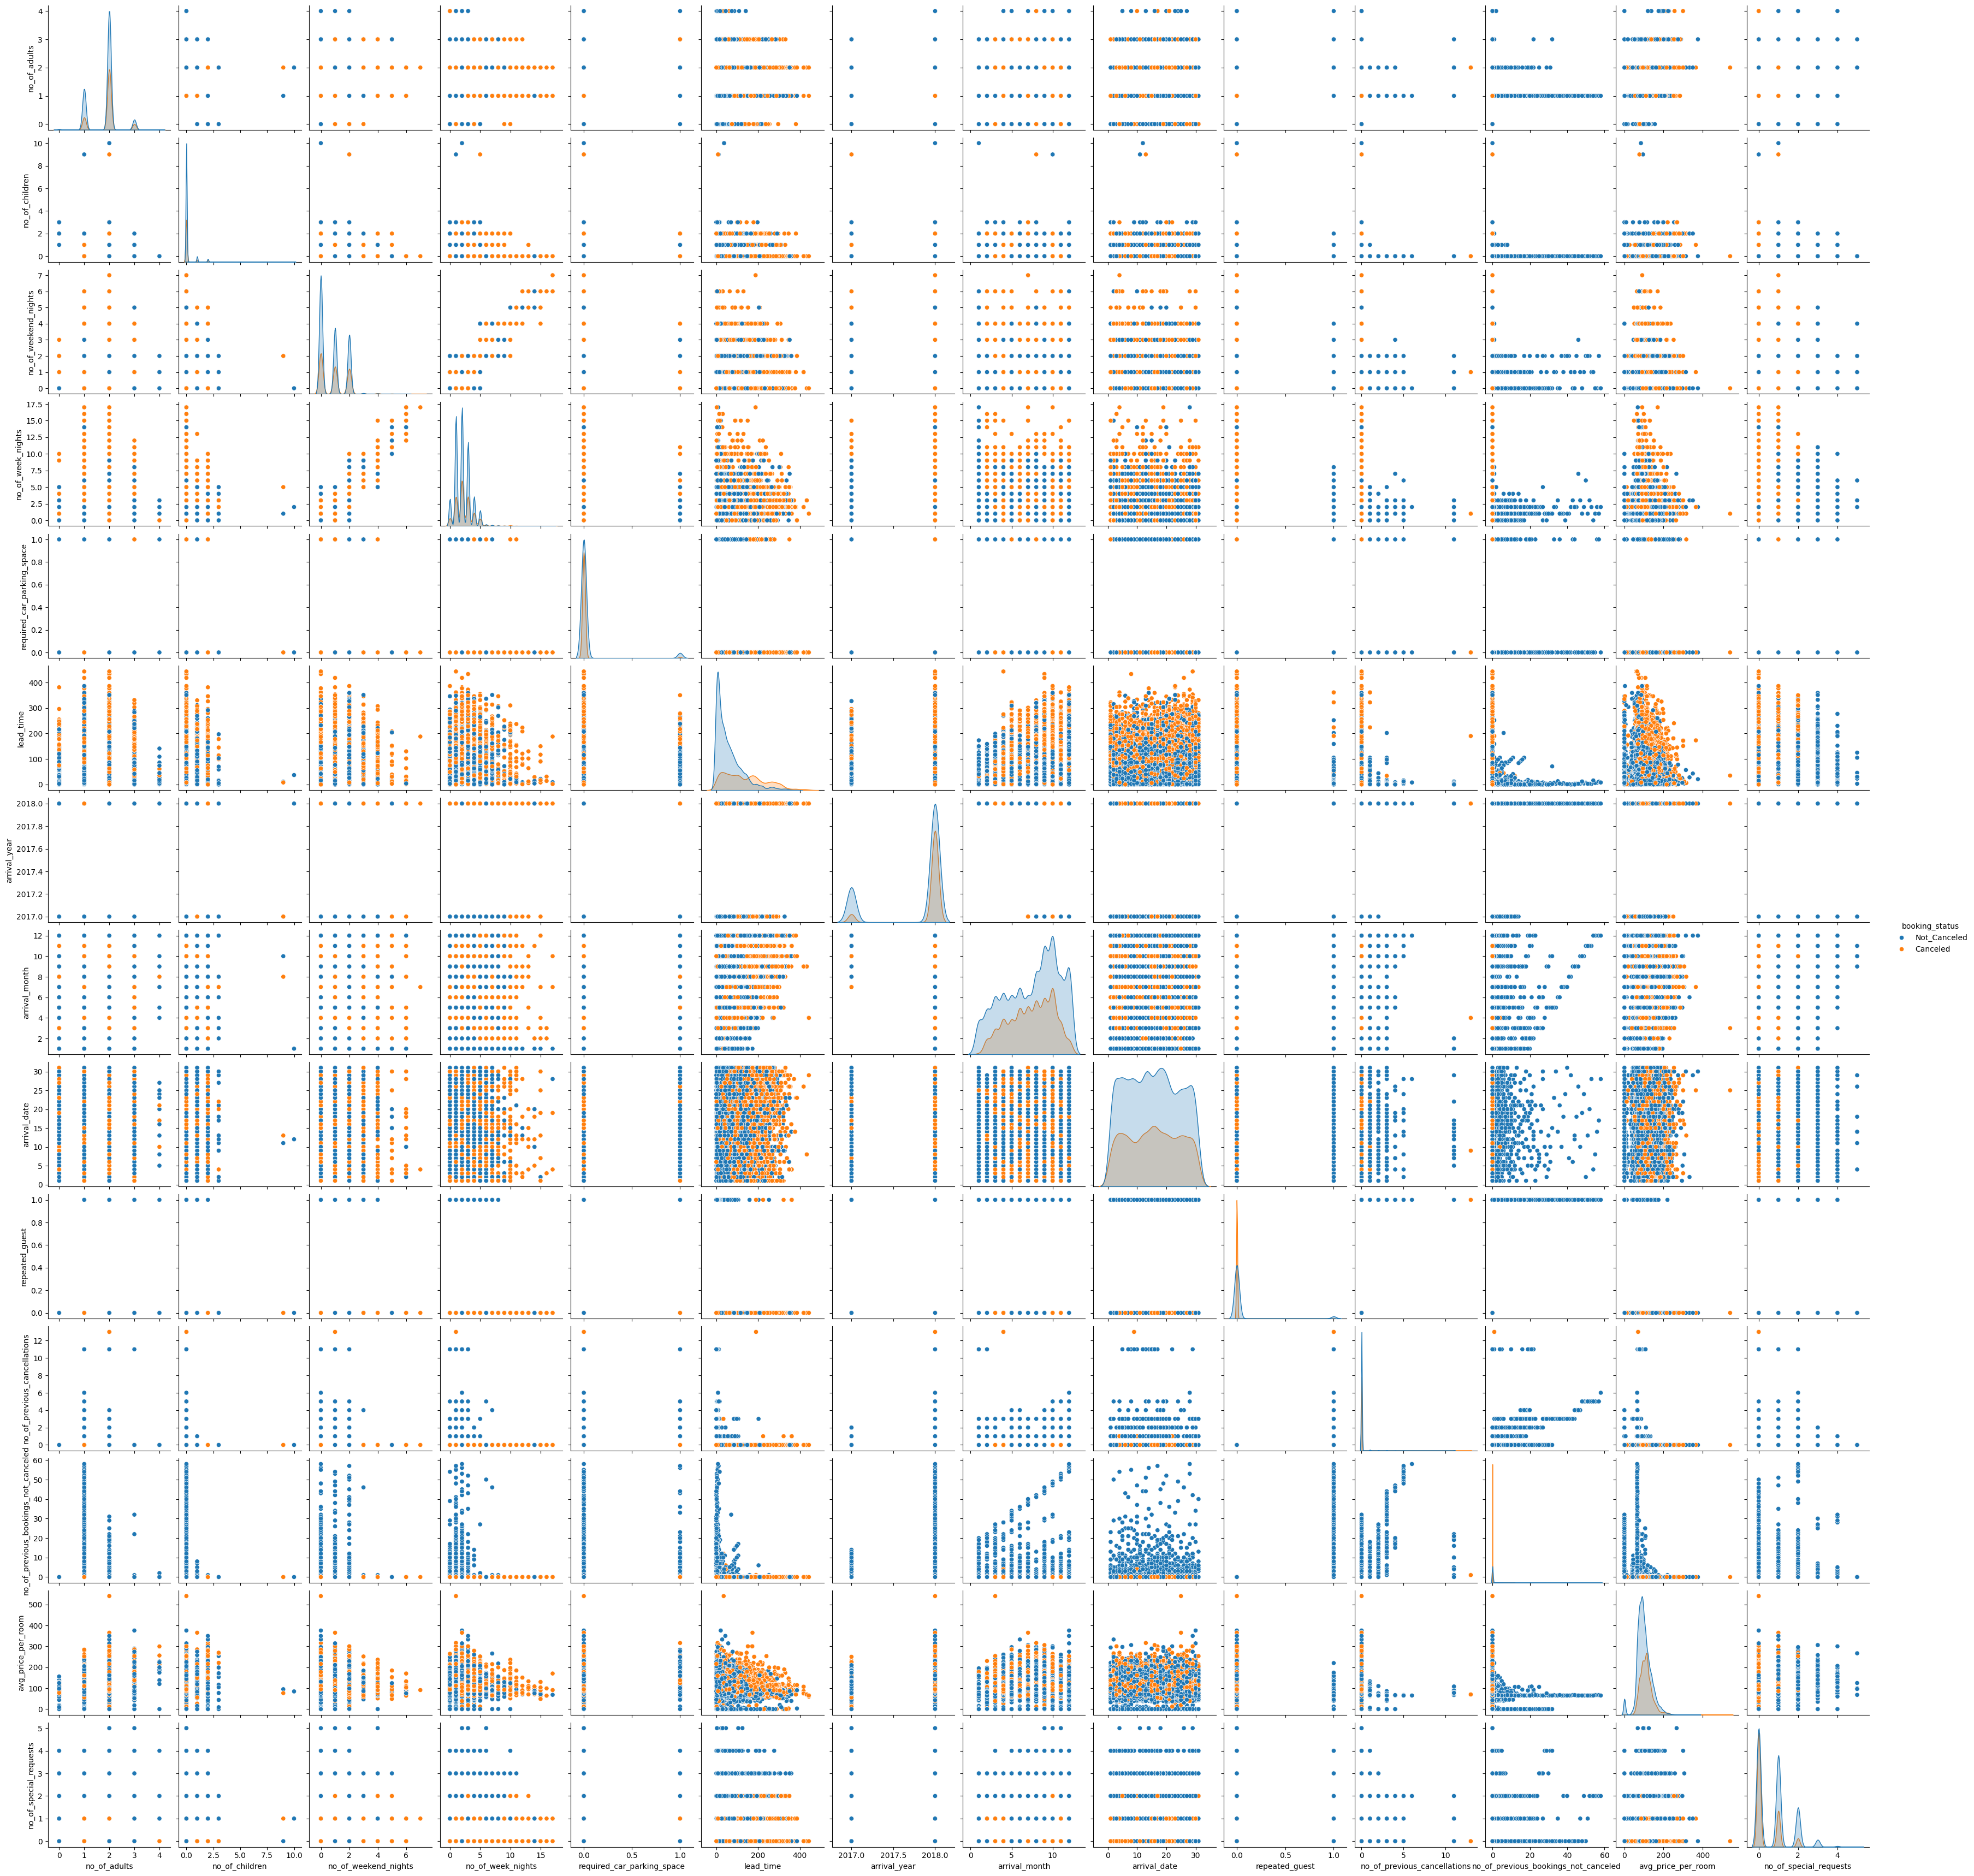

In [23]:
plt.figure(figsize=(15,7))
sns.pairplot(df,hue='booking_status')
plt.show()

-  Bookings with longer lead times tend to have a higher proportion of cancellations.

- Very low prices tend to be cancelled more, while bookings with  high prices are 'Not_Canceled'.

- No_of_special_requests and booking_status have some relation.

## EDA Questions

### What are the busiest months in the hotel?

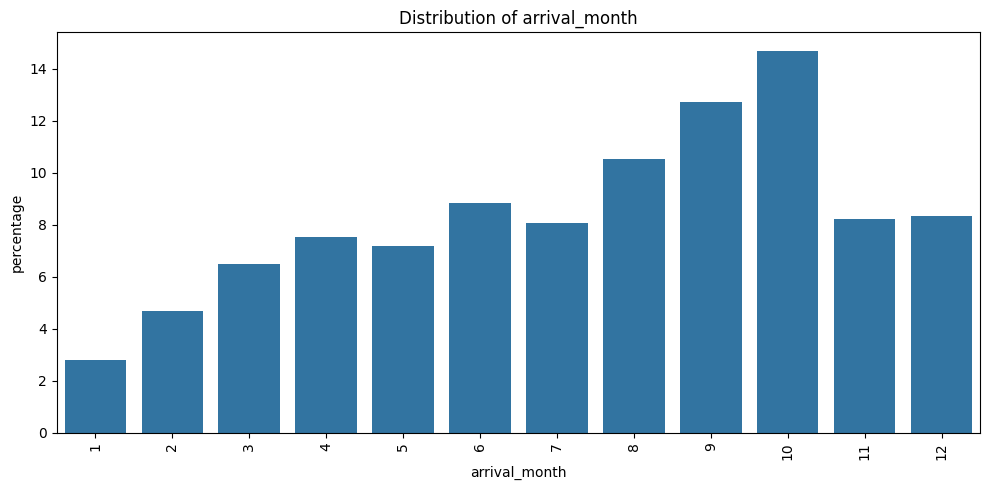

In [24]:
arrival_month_counts = df['arrival_month'].value_counts(normalize=True)*100
plt.figure(figsize=(10,5))
sns.barplot(x=arrival_month_counts.index,y=arrival_month_counts.values)
plt.title('Distribution of arrival_month')
plt.xlabel('arrival_month')
plt.ylabel('percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [25]:
arrival_month_counts

arrival_month
10    14.657478
9     12.711234
8     10.511371
6      8.829773
12     8.328050
11     8.215024
7      8.049621
4      7.542385
5      7.161957
3      6.500345
2      4.697450
1      2.795314
Name: proportion, dtype: float64

**10th month(October)** is the busiest month in the hotel approximately with **14% of bookings**.

### Which market segment do most of the guests come from?

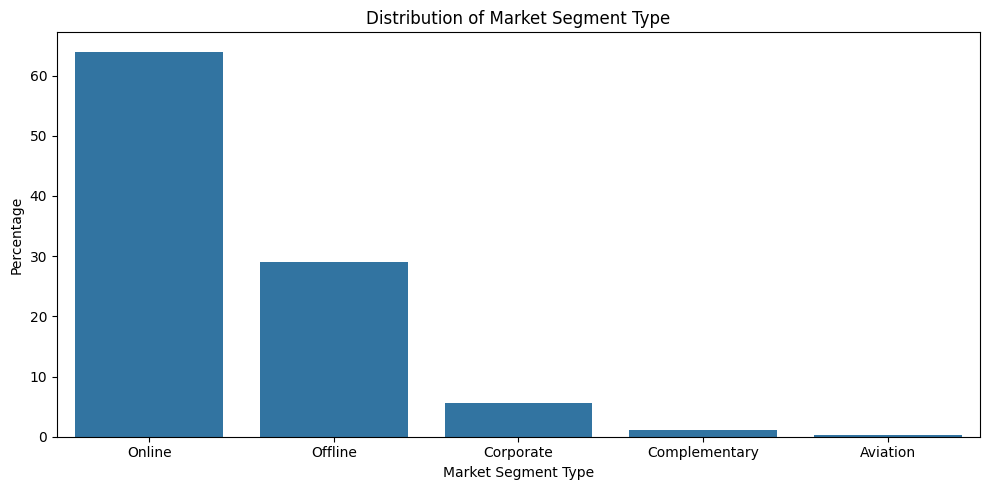

In [26]:
market_segment_counts = df['market_segment_type'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 5))
sns.barplot(x=market_segment_counts.index, y=market_segment_counts.values)
plt.title('Distribution of Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


In [27]:
market_segment_counts

market_segment_type
Online           63.994487
Offline          29.022743
Corporate         5.560303
Complementary     1.077877
Aviation          0.344590
Name: proportion, dtype: float64

Most of the guests come from **Online** market_segment with **64%** of bookings.

### Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?

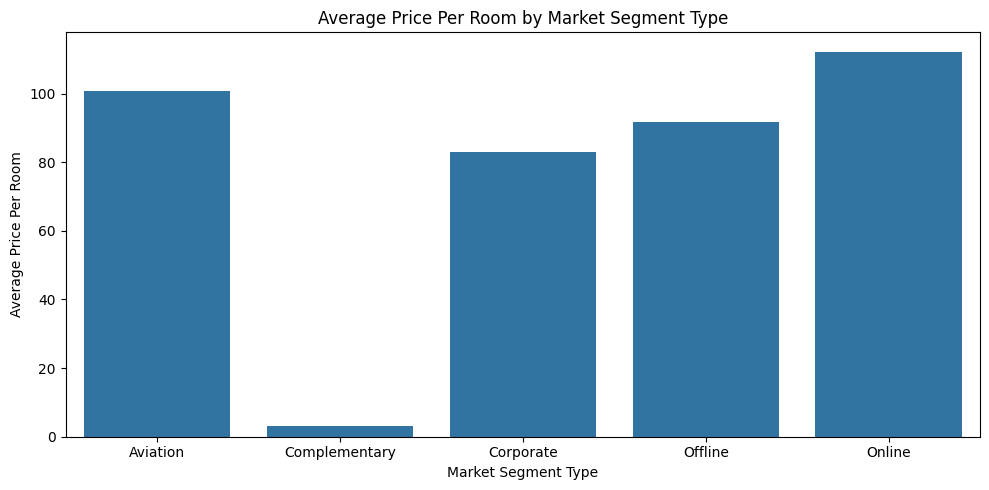

In [28]:
avg_price_per_segment = df.groupby('market_segment_type')['avg_price_per_room'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=avg_price_per_segment.index, y=avg_price_per_segment.values)
plt.title('Average Price Per Room by Market Segment Type')
plt.xlabel('Market Segment Type')
plt.ylabel('Average Price Per Room')
plt.tight_layout()
plt.show()


In [29]:
avg_price_per_segment

market_segment_type
Aviation         100.704000
Complementary      3.141765
Corporate         82.911740
Offline           91.632679
Online           112.256855
Name: avg_price_per_room, dtype: float64

- Bookings made through online channels generally command higher prices.

- The Aviation also has high average price but comparitively lower than 'Online'.

- Complementry has the low average prices.

- Bookings made through offline has 3rd highest average prices.

### What percentage of bookings are canceled?

In [30]:
booking_status_counts = df['booking_status'].value_counts(normalize=True)*100
canceled_percentage = booking_status_counts['Canceled']
print('Percentage of Bookings cancelled:',booking_status_counts['Canceled'])

Percentage of Bookings cancelled: 32.76361130254997


Approximately 32% of overall bookings are cancelled.

### Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?

In [31]:
repeated_guests = df[df['repeated_guest'] == 1]
canceled_repeated_guests = repeated_guests['booking_status'].value_counts(normalize=True) * 100
print('Percentage of repeating guests cancel:',canceled_repeated_guests['Canceled'])

Percentage of repeating guests cancel: 1.7204301075268817


Approximately 1.7% of repeated guests canceled their booking.

### Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

<Figure size 1000x500 with 0 Axes>

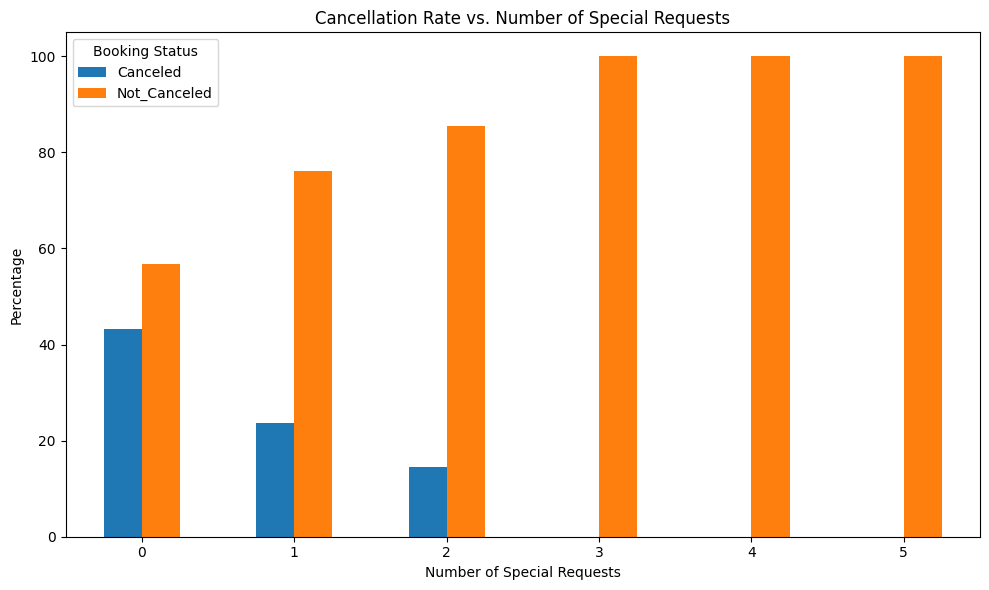

In [32]:
special_requests_cancellation = df.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True).unstack() * 100

plt.figure(figsize=(10, 5))
special_requests_cancellation.plot(kind='bar', figsize=(10, 6))
plt.title('Cancellation Rate vs. Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Booking Status')
plt.tight_layout()
plt.show()



- Customers with special requirements ofter do not cancel their booking.

- Lesser the special requirements higher the chances of cancelling the booking.

# Data Preprocessing

In [33]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

- There are no missing values in this data.

In [34]:
df.duplicated().sum()

np.int64(0)

- There are no duplicate values in the data.

## Outliers Treatment

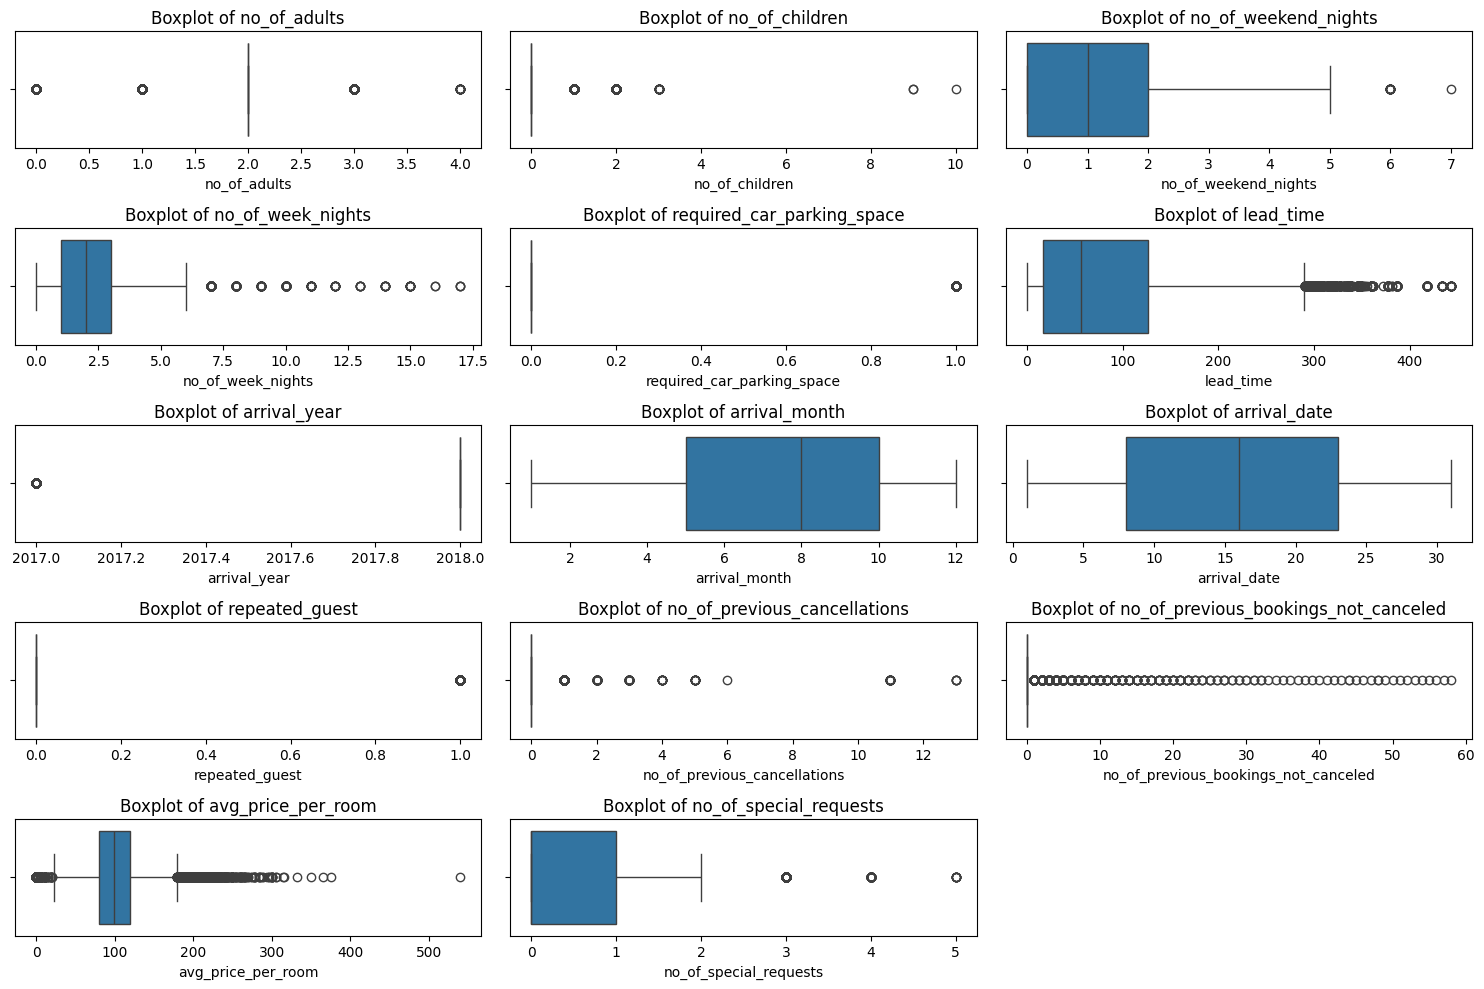

In [35]:
numeric_columns = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
num_cols = len(numeric_columns)
rows = (num_cols + 2) // 3
for i, variable in enumerate(numeric_columns):
    plt.subplot(rows, 3, i + 1)
    sns.boxplot(data=df, x=variable)
    plt.title(f'Boxplot of {variable}')
plt.tight_layout()
plt.show()

We don not treat the outliers because they are proper values that influence the target variable.

## Feature Engineering

In [36]:
df['booking_status'].value_counts()

booking_status
Not_Canceled    24390
Canceled        11885
Name: count, dtype: int64

In [37]:
df['type_of_meal_plan'].value_counts()

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64

In [38]:
df['room_type_reserved'].value_counts()

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [39]:
df['market_segment_type'].value_counts()

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [40]:
replaceStruct = {'type_of_meal_plan': {'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3, 'Not Selected':-1},
                 'room_type_reserved': {'Room_Type 1': 1,'Room_Type 2': 2,'Room_Type 3': 3,'Room_Type 4': 4,'Room_Type 5': 5,'Room_Type 6': 6,'Room_Type 7': 7},
                 'booking_status': {'Not_Canceled': 0, 'Canceled': 1}}

In [41]:
oneHotCols = ['market_segment_type']

In [42]:
df.drop('Booking_ID',axis=1,inplace=True)

In [43]:
df=df.replace(replaceStruct)
df=pd.get_dummies(df, columns=oneHotCols,dtype='float')
df.head(10)


/tmp/ipython-input-2390581867.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace(replaceStruct)


no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   
5             2               0                     0                  2   
6             2               0                     1                  3   
7             2               0                     1                  3   
8             3               0                     0                  4   
9             2               0                     0                  5   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                  1                           0                   1   
1                 -1                           0                   1   
2                  1                           0                   1   
3                  1                           0                   1   
4                 -1                           0                   1   
5                  2                           0                   1   
6                  1                           0                   1   
7                  1                           0                   4   
8                  1                           0                   1   
9                  1                           0                   4   

   lead_time  arrival_year  arrival_month  ...  no_of_previous_cancellations  \
0        224          2017             10  ...                             0   
1          5          2018             11  ...                             0   
2          1          2018              2  ...                             0   
3        211          2018              5  ...                             0   
4         48          2018              4  ...                             0   
5        346          2018              9  ...                             0   
6         34          2017             10  ...                             0   
7         83          2018             12  ...                             0   
8        121          2018              7  ...                             0   
9         44          2018             10  ...                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   
5                                     0              115.00   
6                                     0              107.55   
7                                     0              105.61   
8                                     0               96.90   
9                                     0              133.44   

   no_of_special_requests  booking_status  market_segment_type_Aviation  \
0                       0               0                           0.0   
1                       1               0                           0.0   
2                       0               1                           0.0   
3                       0               1                           0.0   
4                       0               1                           0.0   
5                       1               1                           0.0   
6                       1               0                           0.0   
7                       1               0                           0.0   
8                       1               0                           0.0   
9                       3               0       

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  int64  
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  repeated_guest 

## Data Splitting

In [45]:
df.dropna(inplace=True)
X = df.drop('booking_status',axis=1)

X = X.drop('market_segment_type_Aviation', axis=1)
y = df['booking_status']
X= add_constant(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state =1,stratify=y)

In [46]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


In [47]:
print(X_train)

       const  no_of_adults  no_of_children  no_of_weekend_nights  \
6870     1.0             2               0                     2   
531      1.0             2               1                     0   
3394     1.0             1               0                     0   
23540    1.0             1               0                     1   
15302    1.0             2               0                     1   
...      ...           ...             ...                   ...   
34706    1.0             3               0                     1   
24436    1.0             3               0                     2   
10245    1.0             1               0                     0   
7511     1.0             1               0                     0   
13828    1.0             2               0                     2   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
6870                   3                  1                           0   
531                    3         

In [48]:
print(X_test)

       const  no_of_adults  no_of_children  no_of_weekend_nights  \
22801    1.0             2               0                     0   
3830     1.0             2               0                     0   
33959    1.0             2               0                     1   
14068    1.0             3               0                     0   
10215    1.0             3               0                     2   
...      ...           ...             ...                   ...   
29006    1.0             2               0                     2   
29785    1.0             2               0                     0   
9739     1.0             2               0                     0   
1580     1.0             2               0                     0   
12880    1.0             2               0                     0   

       no_of_week_nights  type_of_meal_plan  required_car_parking_space  \
22801                  1                 -1                           0   
3830                   3         

# Model Building

## Logestic Regression Model

In [49]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
lg = sm.Logit(y_train, X_train).fit()

         Current function value: 0.423007
         Iterations: 35


/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sat, 06 Dec 2025   Pseudo R-squ.:                  0.3312
Time:                        03:36:19   Log-Likelihood:                -10741.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -834.4989    118.427     -7.047      0.000   -1066.612    -602.386
no_of_adults                             0.0497      

Few columns have **high P-Value** which can effect model performance.

### Logestic Regression Model performance

In [51]:
pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)
pred_test = lg.predict(X_test) > 0.5
pred_test = np.round(pred_test)


In [52]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [53]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy   Recall  Precision       F1
0  0.806435  0.63349   0.738509  0.68198


#### Confusion Matrix

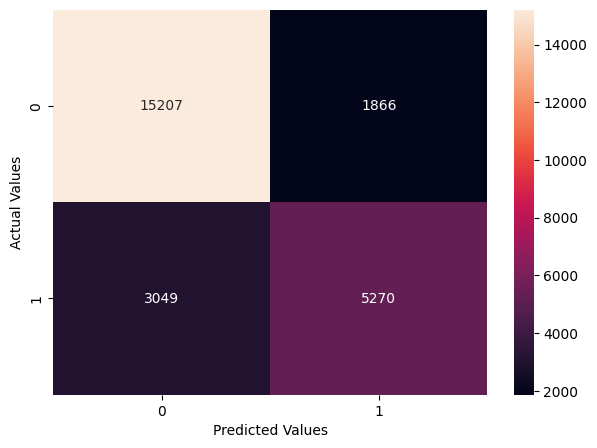

In [54]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

* True Positives (TP):  The customer has not cancelled the booking and the model predicted customer has not canceled the booking.

* True Negatives (TN): The customer had cancelled the booking and the model predicted customer has cancelled the booking.

* False Positives (FP): The model predicted customer has not cancelled the booking but the customer has cancelled the booking.

* False Negatives (FN): The model predicted customer has cancelled the booking but the customer has not cancelled the booking.

#### roc_auc_score

In [55]:
print('roc_auc_score on training set : ', roc_auc_score(y_train, pred_train))
print('roc_auc_score on testing set : ', roc_auc_score(y_test, pred_test))


roc_auc_score on training set :  0.7620971117237834
roc_auc_score on testing set :  0.7560663398744661


- model can distinguishing well on both Training set and Testing set.

## Decision Tree Model(Without Pruning)

In [56]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train.drop('const', axis=1), y_train)

DecisionTreeClassifier(random_state=1)

### Decision Tree Visualization

In [57]:
feature_names = list(X.drop('const',axis=1).columns)
print(feature_names)

['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests', 'market_segment_type_Complementary', 'market_segment_type_Corporate', 'market_segment_type_Offline', 'market_segment_type_Online']


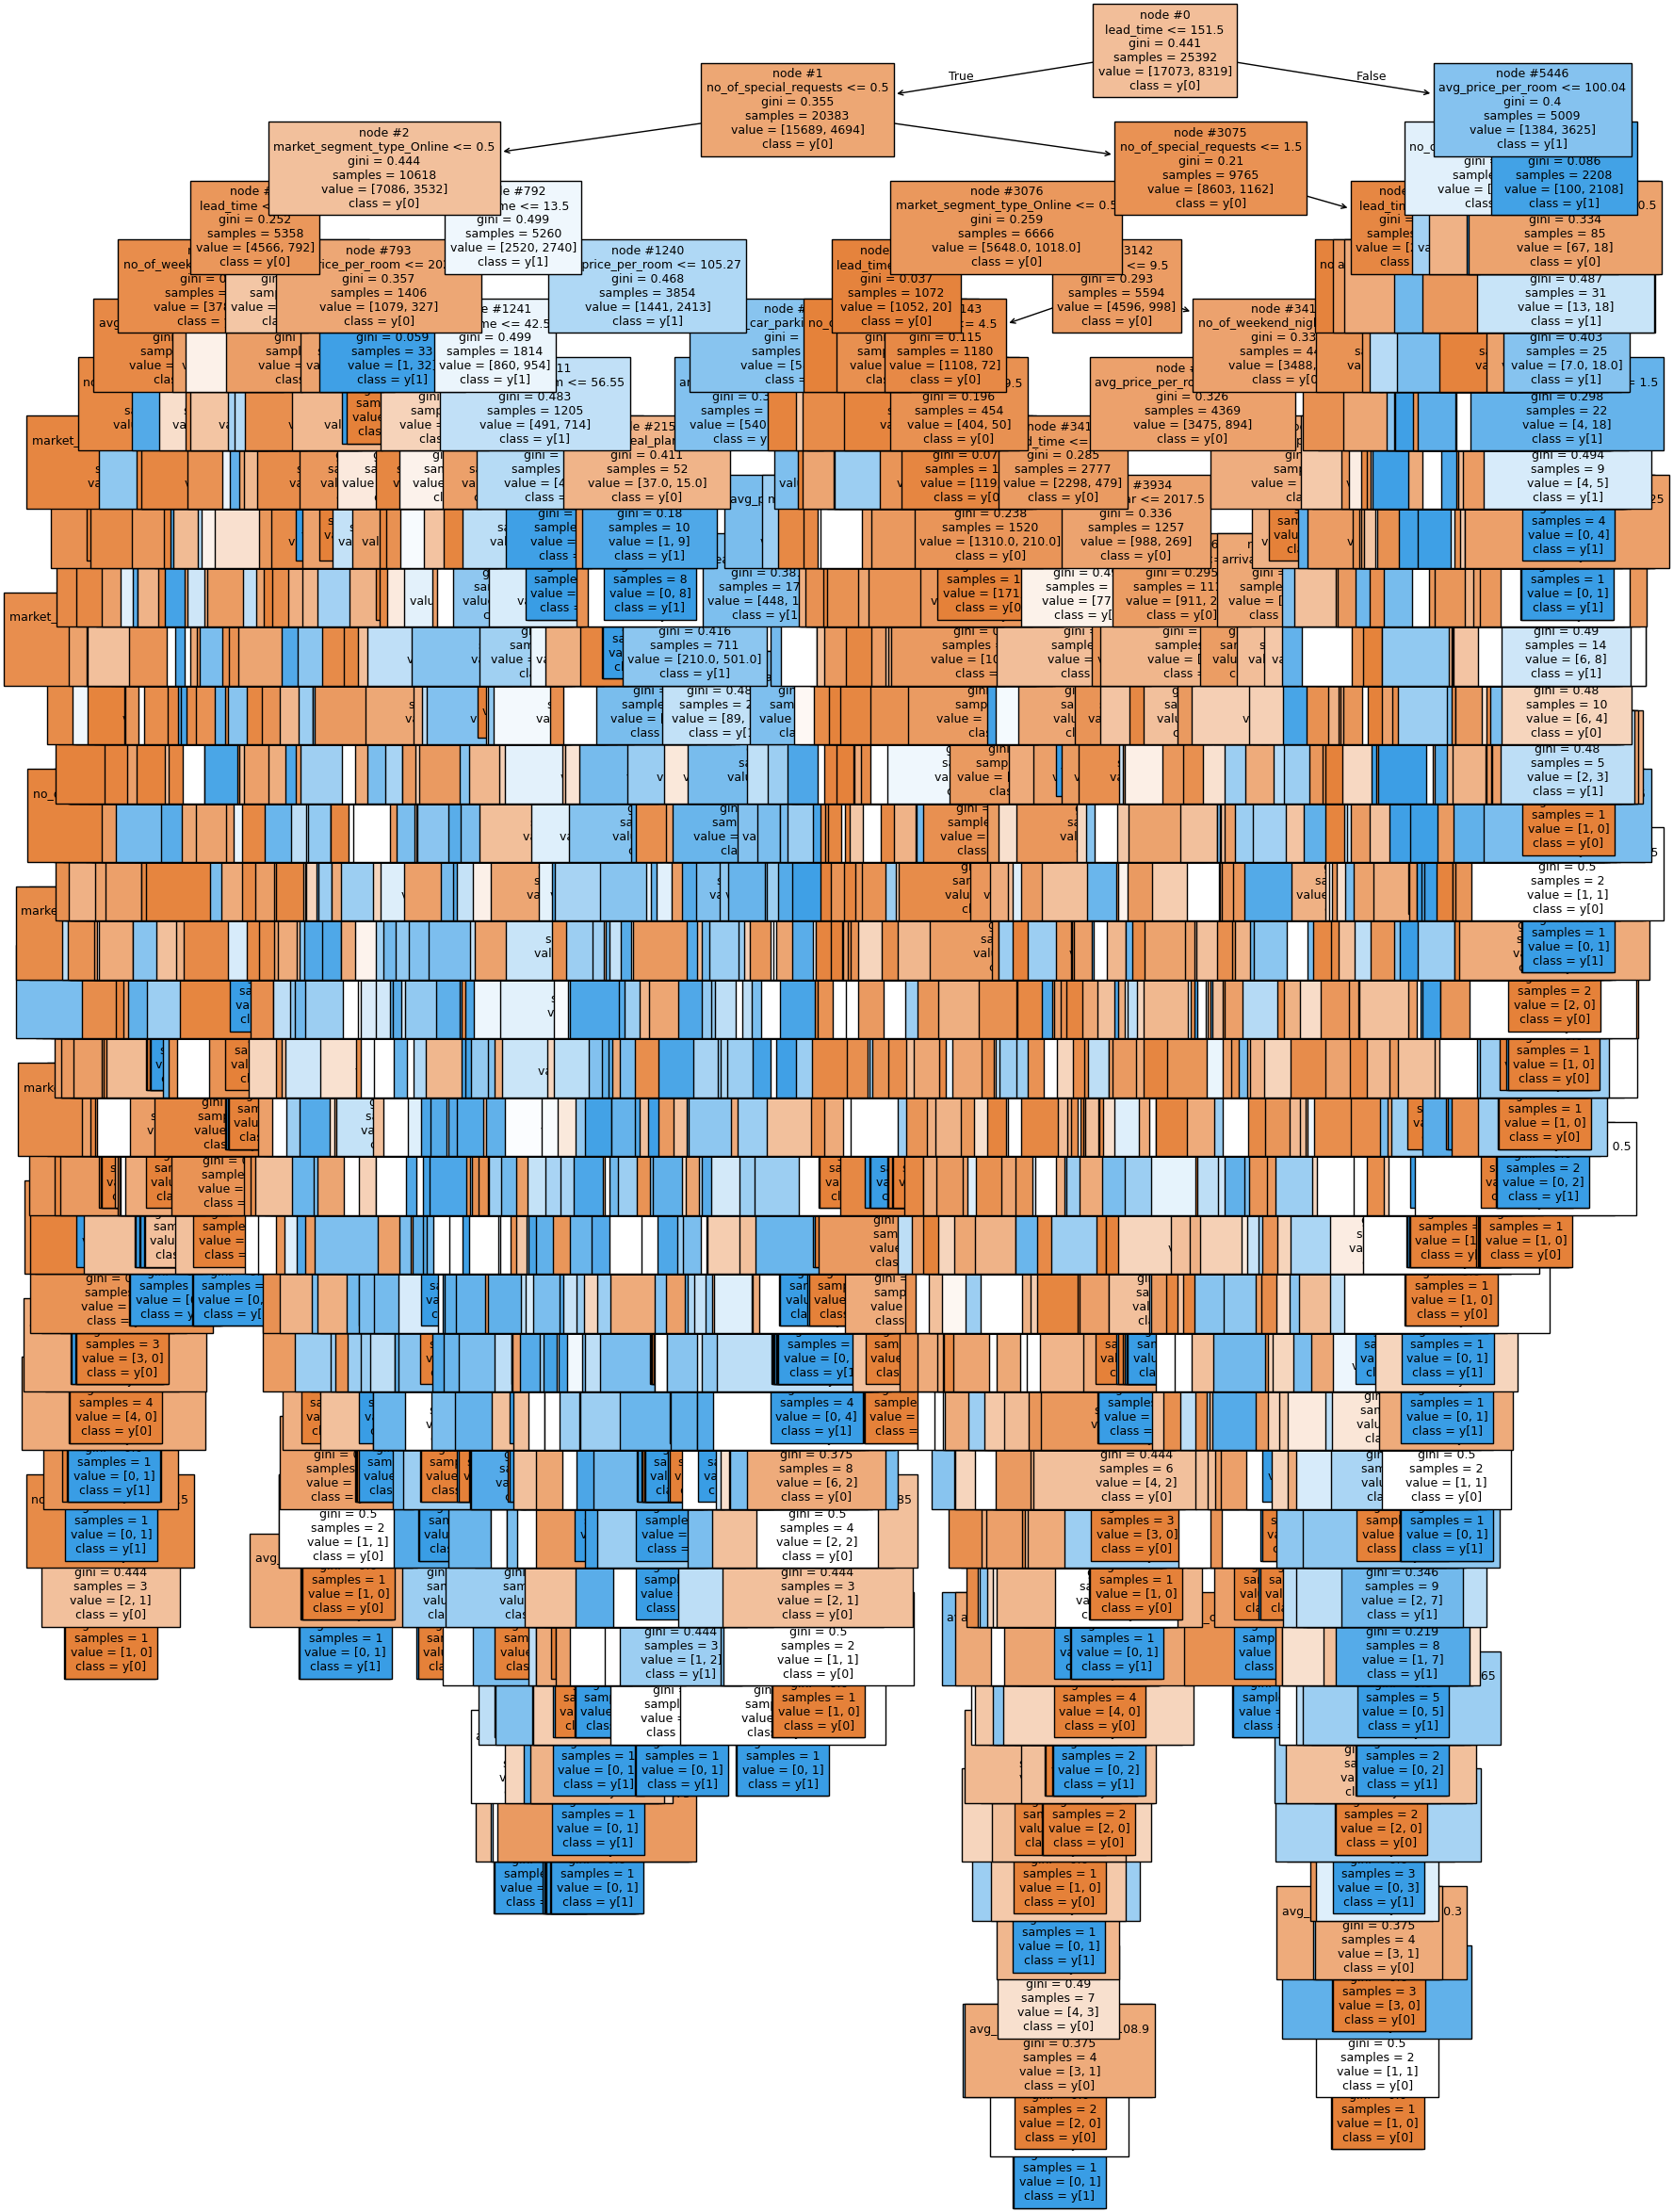

In [58]:
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [59]:
print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 88.60
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [73.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 17
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [150.00, 0.00] class: 0
|   |   |   |   |   |   

In [60]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.drop('const', axis=1).columns).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.345855
avg_price_per_room                    0.174797
market_segment_type_Online            0.086834
arrival_date                          0.084449
no_of_special_requests                0.071219
arrival_month                         0.070196
no_of_week_nights                     0.046483
no_of_adults                          0.034465
no_of_weekend_nights                  0.032904
arrival_year                          0.014476
type_of_meal_plan                     0.012505
room_type_reserved                    0.008796
required_car_parking_space            0.006685
no_of_children                        0.005101
market_segment_type_Offline           0.002518
market_segment_type_Corporate         0.001808
no_of_previous_bookings_not_canceled  0.000654
repeated_guest                        0.000254
no_of_previous_cancellations          0.000000
market_segment_type_Complementary     0.000000


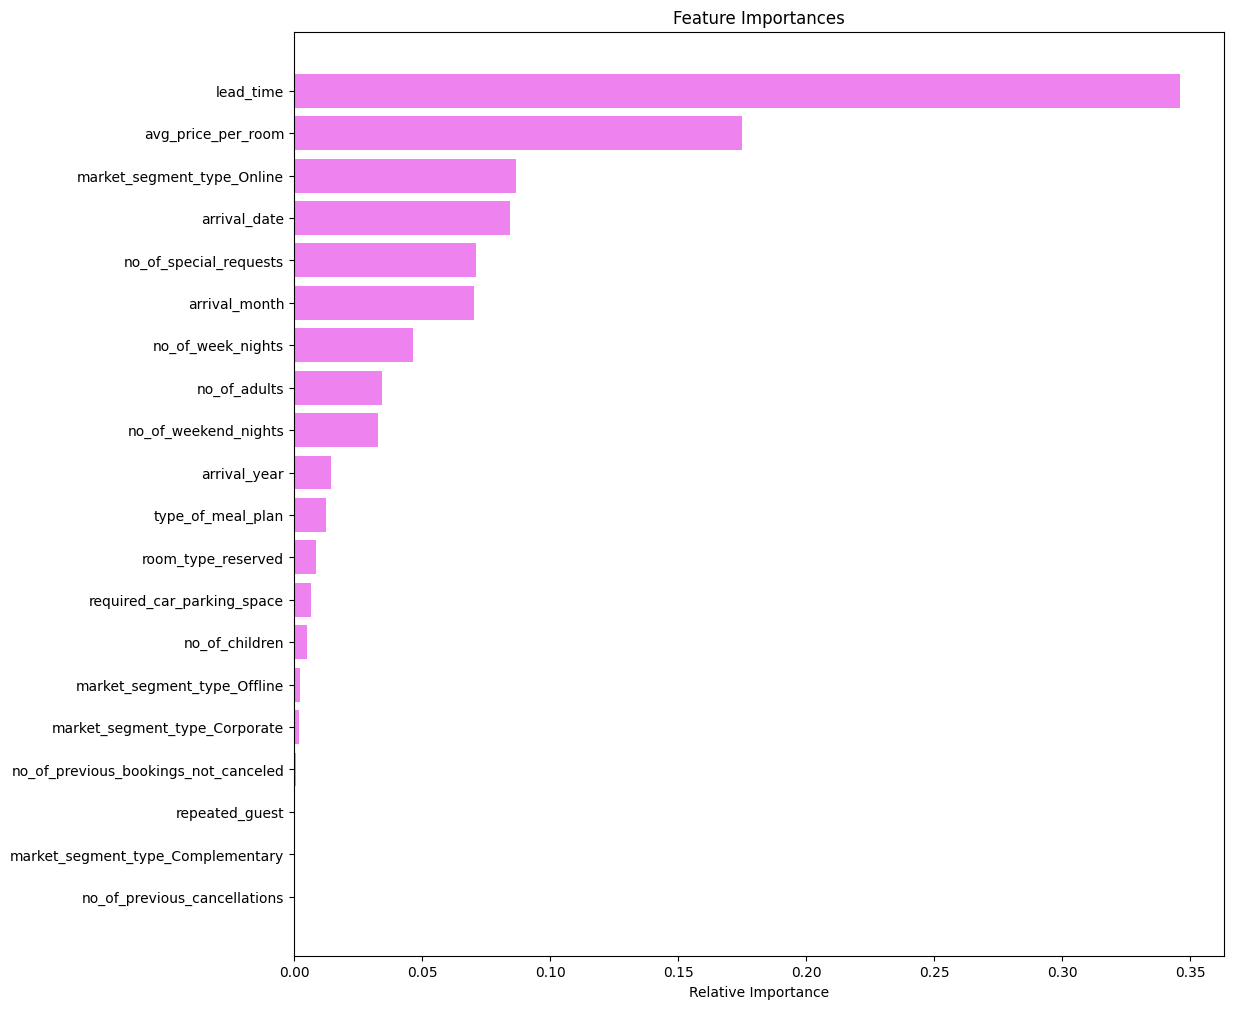

In [61]:
importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Decision Tree Model Performance

#### Training set Performance

In [62]:
def model_performance_classification_sklearn(model, predictors, target):

    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)
    recall = recall_score(target, pred)
    precision = precision_score(target, pred)
    f1 = f1_score(target, pred)


    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [63]:
decision_tree_perf_train_without_pruning = model_performance_classification_sklearn(dTree, X_train.drop('const', axis=1), y_train)
decision_tree_perf_train_without_pruning

Accuracy    Recall  Precision        F1
0  0.994368  0.985695   0.997082  0.991356

 **Confusion Matrix**

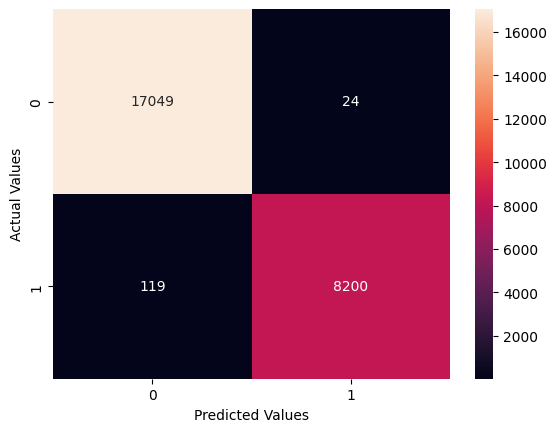

In [64]:
model = dTree
y_actual_train = y_train
y_predict_train = model.predict(X_train.drop('const', axis=1))
cm = confusion_matrix(y_actual_train,y_predict_train)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#### Testing Set Performance

In [65]:
decision_tree_perf_test_without_pruning = model_performance_classification_sklearn(dTree, X_test.drop('const',axis=1), y_test)
decision_tree_perf_test_without_pruning

Accuracy    Recall  Precision        F1
0  0.861068  0.790802   0.786392  0.788591

- The model is performing well on both Training set and Testing set.

- The difference between accuracy of Trainng set and Testing set is large.

- The difference between recall score of Trainng set and Testing set is very large.

 **Confusion Matrix**

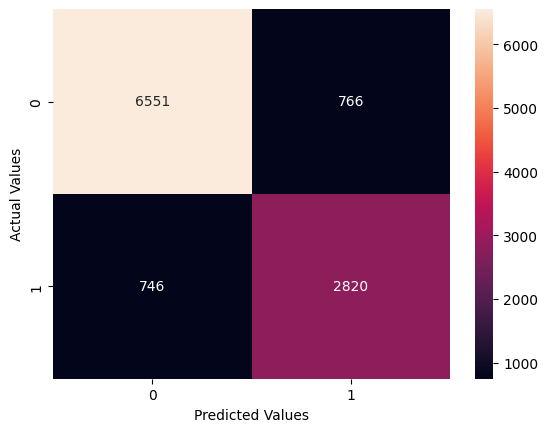

In [66]:
model = dTree
y_actual_test = y_test
y_predict_test = model.predict(X_test.drop('const', axis=1))
cm = confusion_matrix(y_actual_test,y_predict_test)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Model Performance Improvement

## Regression Model Performance Improvement

### Checking for Multicollinearity

In [67]:
vif_series = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns,dtype=float)
print('VIF values: \n\n{}\n'.format(vif_series))

VIF values: 

const                                   3.839020e+07
no_of_adults                            1.331019e+00
no_of_children                          1.271569e+00
no_of_weekend_nights                    1.066172e+00
no_of_week_nights                       1.088316e+00
type_of_meal_plan                       1.361876e+00
required_car_parking_space              1.033816e+00
room_type_reserved                      1.563090e+00
lead_time                               1.359257e+00
arrival_year                            1.389441e+00
arrival_month                           1.270822e+00
arrival_date                            1.006548e+00
repeated_guest                          1.747595e+00
no_of_previous_cancellations            1.321458e+00
no_of_previous_bookings_not_canceled    1.569723e+00
avg_price_per_room                      1.901873e+00
no_of_special_requests                  1.243814e+00
market_segment_type_Complementary       4.296740e+00
market_segment_type_Corporate   

- There is no multicollinearity present in the data.

### Removing high P_values

In [68]:
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sat, 06 Dec 2025   Pseudo R-squ.:                  0.3312
Time:                        03:38:21   Log-Likelihood:                -10741.
converged:                      False   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -834.4989    118.427     -7.047      0.000   -1066.612    -602.386
no_of_adults                             0.0497      

In [69]:
lg.pvalues[lg.pvalues > 0.05].sort_values(ascending=False)

market_segment_type_Complementary       0.998674
market_segment_type_Online              0.940168
no_of_children                          0.473506
no_of_adults                            0.184317
no_of_previous_bookings_not_canceled    0.126908
arrival_date                            0.100264
dtype: float64

These columns have P_Values greater than 0.05 . we will drop each column and check the performance of logestic regression model.

#### Dropping market_segment_type_Complementary as it has highest p_value

In [70]:
X_train1 = X_train.drop('market_segment_type_Complementary', axis=1)

In [71]:
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit()


Optimization terminated successfully.
         Current function value: 0.423283
         Iterations 15


In [72]:
pred_train1 = lg1.predict(X_train1)
pred_train1 = np.round(pred_train1)
print('Accuracy on training set : ', accuracy_score(y_train, pred_train1))

Accuracy on training set :  0.8061988027725268


- There is no significant change in the model performance as compared to initial model.

In [73]:
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sat, 06 Dec 2025   Pseudo R-squ.:                  0.3308
Time:                        03:38:21   Log-Likelihood:                -10748.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -838.3317    118.330     -7.085      0.000   -1070.254    -606.409
no_of_adults                             0.0440      

In [74]:
lg1.pvalues[lg1.pvalues > 0.05].sort_values(ascending=False)

no_of_children                          0.398900
no_of_adults                            0.238629
no_of_previous_bookings_not_canceled    0.127893
market_segment_type_Online              0.123470
arrival_date                            0.103781
dtype: float64

#### Dropping no_of_children due to it's highest p_value

In [75]:
X_train2 = X_train1.drop('no_of_children', axis=1)

In [76]:
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit()

Optimization terminated successfully.
         Current function value: 0.423297
         Iterations 15


In [77]:
pred_train2 = lg2.predict(X_train2)
pred_train2 = np.round(pred_train2)
print('Accuracy on training set : ', accuracy_score(y_train, pred_train2))

Accuracy on training set :  0.8060806553245117


- There is no significant change in the model performance as compared to initial model.

In [78]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25373
Method:                           MLE   Df Model:                           18
Date:                Sat, 06 Dec 2025   Pseudo R-squ.:                  0.3307
Time:                        03:38:21   Log-Likelihood:                -10748.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -842.7455    118.183     -7.131      0.000   -1074.380    -611.111
no_of_adults                             0.0509      

In [79]:
lg2.pvalues[lg2.pvalues > 0.05].sort_values(ascending=False)

no_of_adults                            0.163411
no_of_previous_bookings_not_canceled    0.127954
market_segment_type_Online              0.126969
arrival_date                            0.106228
dtype: float64

#### Dropping no_of_adults as it has highest p_value

In [80]:
X_train3 = X_train2.drop('no_of_adults', axis=1)

In [81]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()

Optimization terminated successfully.
         Current function value: 0.423336
         Iterations 15


In [82]:
pred_train3 = lg3.predict(X_train3)
pred_train3 = np.round(pred_train3)
print('Accuracy on training set : ', accuracy_score(y_train, pred_train3))

Accuracy on training set :  0.8054505356017644


- There is no significant change in the model performance as compared to initial model.

In [83]:
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Sat, 06 Dec 2025   Pseudo R-squ.:                  0.3307
Time:                        03:38:22   Log-Likelihood:                -10749.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                 -838.1585    118.149     -7.094      0.000   -1069.727    -606.590
no_of_weekend_nights                     0.1477      

In [84]:
lg3.pvalues[lg3.pvalues > 0.05].sort_values(ascending=False)

no_of_previous_bookings_not_canceled    0.127137
arrival_date                            0.096613
market_segment_type_Online              0.095477
dtype: float64

#### Dropping no_of_previous_bookings_not_canceled due to it's highest p_value

In [85]:
X_train4 = X_train3.drop('no_of_previous_bookings_not_canceled', axis=1)

In [86]:
logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit()

Optimization terminated successfully.
         Current function value: 0.423503
         Iterations 10


In [87]:
pred_train4 = lg4.predict(X_train4)
pred_train4 = np.round(pred_train4)
print('Accuracy on training set : ', accuracy_score(y_train, pred_train4))

Accuracy on training set :  0.805489918084436


- There is no significant change in the model performance as compared to initial model.

In [88]:
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25375
Method:                           MLE   Df Model:                           16
Date:                Sat, 06 Dec 2025   Pseudo R-squ.:                  0.3304
Time:                        03:38:22   Log-Likelihood:                -10754.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -833.9312    118.159     -7.058      0.000   -1065.518    -602.345
no_of_weekend_nights              0.1478      0.020      7.468      0.000 

In [89]:
lg4.pvalues[lg4.pvalues > 0.05].sort_values(ascending=False)

arrival_date                  0.103148
market_segment_type_Online    0.093203
dtype: float64

#### Dropping arrival_date due to highest p_value

In [90]:
X_train5 = X_train4.drop('arrival_date',axis=1)

In [91]:
logit5 = sm.Logit(y_train,X_train5.astype(float))
lg5 = logit5.fit()

Optimization terminated successfully.
         Current function value: 0.423555
         Iterations 10


In [92]:
pred_train5 = lg5.predict(X_train5)
pred_train5 = np.round(pred_train5)
print('Accuracy on training set : ', accuracy_score(y_train, pred_train5))

Accuracy on training set :  0.8062381852551985


- There is no significant change in the model performance as compared to initial model.

In [93]:
print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25376
Method:                           MLE   Df Model:                           15
Date:                Sat, 06 Dec 2025   Pseudo R-squ.:                  0.3303
Time:                        03:38:22   Log-Likelihood:                -10755.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -833.9237    118.210     -7.055      0.000   -1065.612    -602.236
no_of_weekend_nights              0.1486      0.020      7.511      0.000 

#### Dropping market_segment_type_Online due to highest p_value

In [94]:
X_train6 = X_train5.drop('market_segment_type_Online',axis=1)

In [95]:
logit6 = sm.Logit(y_train,X_train6.astype(float))
lg6 = logit6.fit()

Optimization terminated successfully.
         Current function value: 0.423615
         Iterations 11


In [96]:
pred_train6 = lg6.predict(X_train6)
pred_train6 = np.round(pred_train6)
print('Accuracy on training set : ', accuracy_score(y_train, pred_train6))

Accuracy on training set :  0.8062775677378702


- There is no significant change in the model performance as compared to initial model.

In [97]:
print(lg6.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25377
Method:                           MLE   Df Model:                           14
Date:                Sat, 06 Dec 2025   Pseudo R-squ.:                  0.3302
Time:                        03:38:23   Log-Likelihood:                -10756.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                          -822.8170    118.050     -6.970      0.000   -1054.190    -591.444
no_of_weekend_nights              0.1485      0.020      7.512      0.000 

- All the insignificant predictor columns have been removed.

- Now all the columns left are significant predictors of regression model.

### Coefficient interpretations

- Coefficient of columns named no_of_weekend_nights, no_of_week_nights, lead_time, arrival_year, no_of_previous_cancellations, avg_price_per_room  are positive. An increase in these columns will lead to increase in chances of a customer not cancelling the booking.

- Coefficients of columns named type_of_meal_plan, required_car_parking_space, room_type_reserved, arrival_month, repeated_guest, no_of_special_requests, market_segment_type_Corporate, market_segment_type_Offline are negative. Increase in these columns lead to decrease in chances of a customer not cancelling the booking.

#### Odds from coefficients

In [98]:
odds = np.exp(lg6.params)
pd.DataFrame(odds, X_train6.columns, columns=["odds"]).T

const  no_of_weekend_nights  no_of_week_nights  type_of_meal_plan  \
odds    0.0              1.160148           1.034506           0.941232   

      required_car_parking_space  room_type_reserved  lead_time  arrival_year  \
odds                    0.196969            0.881046    1.01605      1.501627   

      arrival_month  repeated_guest  no_of_previous_cancellations  \
odds       0.951464        0.046319                      1.333083   

      avg_price_per_room  no_of_special_requests  \
odds            1.019342                 0.22738   

      market_segment_type_Corporate  market_segment_type_Offline  
odds                       0.401084                     0.172486

#### Percentage change in odds

In [99]:
perc_change_odds = (np.exp(lg6.params) - 1) * 100
pd.DataFrame(perc_change_odds, X_train6.columns, columns=["change_odds%"]).T

const  no_of_weekend_nights  no_of_week_nights  \
change_odds% -100.0             16.014806           3.450587   

              type_of_meal_plan  required_car_parking_space  \
change_odds%          -5.876846                  -80.303095   

              room_type_reserved  lead_time  arrival_year  arrival_month  \
change_odds%          -11.895437    1.60502     50.162716       -4.85361   

              repeated_guest  no_of_previous_cancellations  \
change_odds%      -95.368123                      33.30831   

              avg_price_per_room  no_of_special_requests  \
change_odds%            1.934245              -77.262006   

              market_segment_type_Corporate  market_segment_type_Offline  
change_odds%                     -59.891633                   -82.751436

- `no_of_weekend_nights`: Holding all other features constant, a unit change in no_of_weekend_nights will increase the odds of a customer not cancelling the booking by 1.16 times or a 16.01% increase in the odds of not cancelling the booking.

- `no_of_week_nights`: Holding all other features constant, a unit change in no_of_week_nights will increase the odds of a customer not cancelling the booking by 1.03 times or a 3.45% increase in the odds of not cancelling the booking.

- `type_of_meal_plan`: Holding all other features constant, a unit change in type_of_meal_plan will increase the odds of a customer not cancelling the booking by 0.94 times or a 5.87% decrease in the odds of not cancelling the booking.

- `required_car_parking_space`: Holding all other features constant, a unit change in required_car_parking_space will increase the odds of a customer not cancelling the booking by 0.19 times or a 80.3% decrease in the odds of not cancelling the booking.

- `room_type_reserved`: Holding all other features constant, a unit change in room_type_reserved will increase the odds of a customer not cancelling the booking by 0.88 times or a 11.89% decrease in the odds of not cancelling the booking.

- `	lead_time`: Holding all other features constant, a unit change in 	lead_time will increase the odds of a customer not cancelling the booking by 1.01 times or a 1.60% increase in the odds of not cancelling the booking.

- `	arrival_year`: Holding all other features constant, a unit change in 	arrival_year will increase the odds of a customer not cancelling the booking by 1.5 times or a 50.16% increase in the odds of not cancelling the booking.

- `arrival_month`: Holding all other features constant, a unit change in arrival_month will increase the odds of a customer not cancelling the booking by 0.85 times or a 4.85% decrease in the odds of not cancelling the booking.

- `repeated_guest`: Holding all other features constant, a unit change in repeated_guest will increase the odds of a customer not cancelling the booking by 0.046 times or a 95.36% decrease in the odds of not cancelling the booking.

- `no_of_previous_cancellations`: Holding all other features constant, a unit change in no_of_previous_cancellations will increase the odds of a customer not cancelling the booking by
 1.33 times or a 33.3% increase in the odds of not cancelling the booking.

- `avg_price_per_room	`: Holding all other features constant, a unit change in avg_price_per_room	 will increase the odds of a customer not cancelling the booking by 1.01 times or a 1.93% increase in the odds of not cancelling the booking.

- `no_of_special_requests`: Holding all other features constant, a unit change in no_of_special_requests will increase the odds of a customer not cancelling the booking by 0.22 times or a 77.26% decrease in the odds of not cancelling the booking.

- `market_segment_type_Corporate`: Holding all other features constant, a unit change in market_segment_type_Corporate will increase the odds of a customer not cancelling the booking by    0.40 times or a 59.89% decrease in the odds of not cancelling the booking.

- `market_segment_type_Offline`: Holding all other features constant, a unit change in market_segment_type_Offline will increase the odds of a customer not cancelling the booking by    0.17 times or a 82.75% decrease in the odds of not cancelling the booking.

### Performance Metrics of the final Regression model - 'lg6'

 **Training set Performance**

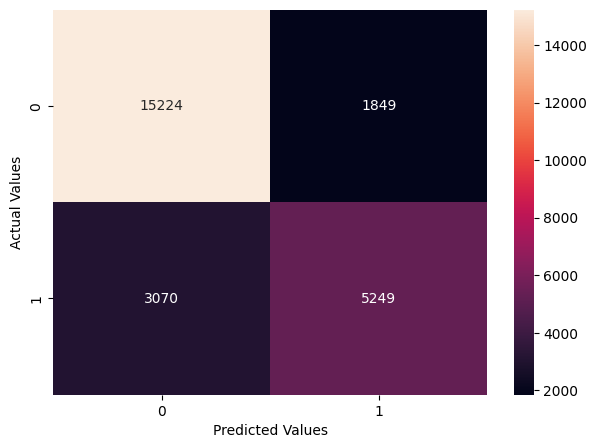

In [100]:
cm = confusion_matrix(y_train, pred_train6)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [101]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg6, X_train6, y_train)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.806278  0.630965   0.739504  0.680937

**Test set Performance**

In [102]:
X_test6 = X_test[list(X_train6.columns)]

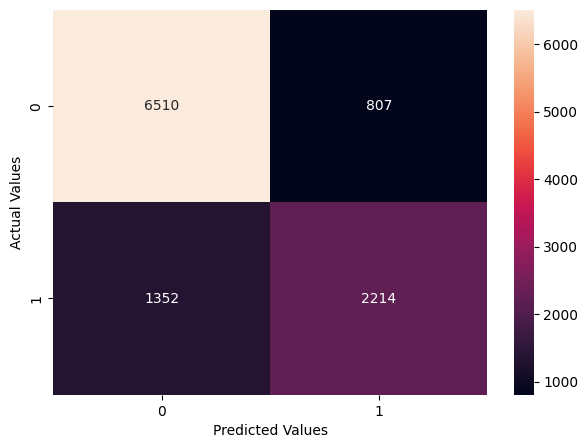

In [103]:
pred_test_lg6 = lg6.predict(X_test6) > 0.5
pred_test_lg6 = np.round(pred_test_lg6)
cm = confusion_matrix(y_test, pred_test_lg6)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [104]:
log_reg_model_test_perf = model_performance_classification_statsmodels(lg6, X_test6, y_test)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0  0.801617  0.620864    0.73287  0.672233

- The model is giving an average f1_score of ~0.680 and ~0.672 on the train and test sets respectively.

- As the train and test performances are comparable, the model is not overfitting.

- Let's see if the f1_score can be improved further by changing the model threshold.


#### ROC Curve and ROC-AUC

- ROC-AUC on training set

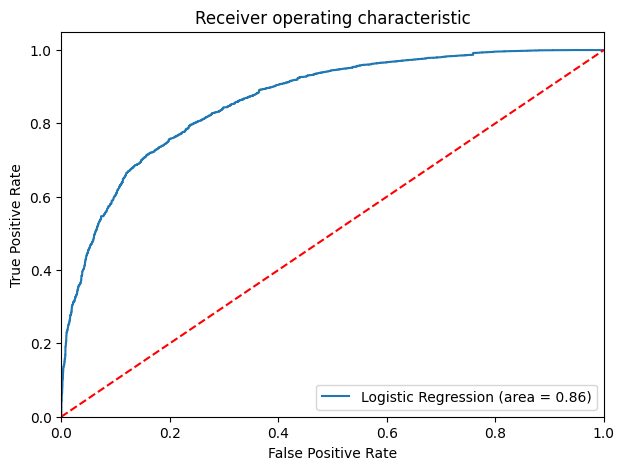

In [105]:
logit_roc_auc_train = roc_auc_score(y_train, lg6.predict(X_train6))
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(X_train6))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Logistic Regression model is giving a good performance on training set.

#### Optimal threshold using AUC-ROC curve

In [162]:
fpr, tpr, thresholds = roc_curve(y_train, lg6.predict(X_train6))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print('Optimal Threshold Value:',optimal_threshold_auc_roc)

Optimal Threshold Value: 0.30381746229941814


**Model performance on Training set with Optimal Threshold**

In [107]:
pred_train6_opt_threshold = lg6.predict(X_train6) > optimal_threshold_auc_roc

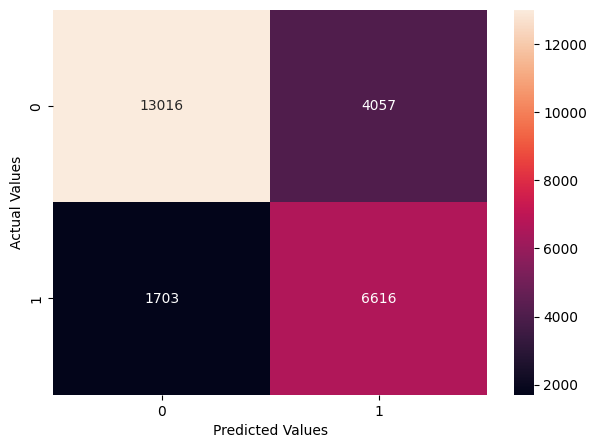

In [108]:
cm = confusion_matrix(y_train, pred_train6_opt_threshold)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [109]:
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg6, X_train6, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision        F1
0  0.773157  0.795288   0.619882  0.696714

- Recall and F1 of model has increased but the other metrics have reduced.
- The model is still giving a good performance.

**Model performance on Testing set with Optimal Threshold**

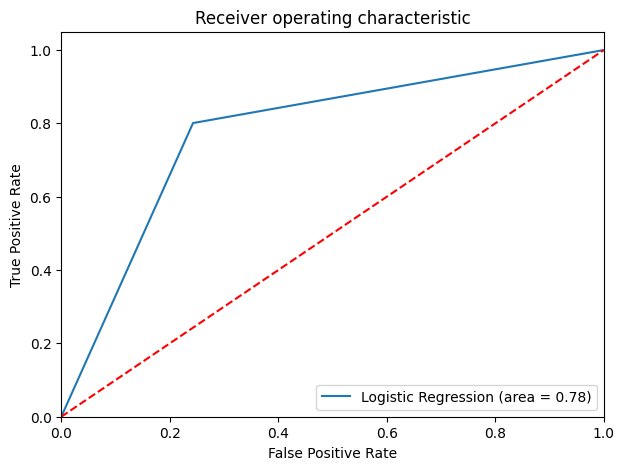

In [110]:
logit_roc_auc_test = roc_auc_score(y_test, lg6.predict(X_test6)>0.30)
fpr, tpr, thresholds = roc_curve(y_test, lg6.predict(X_test6)>0.30)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [111]:
pred_test6_opt_threshold = lg6.predict(X_test6) > optimal_threshold_auc_roc

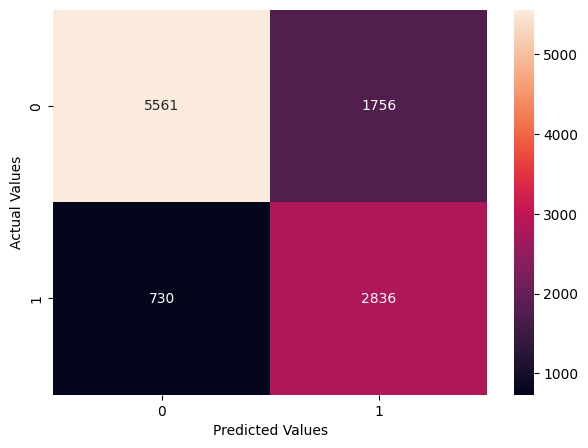

In [112]:
cm = confusion_matrix(y_test, pred_test6_opt_threshold)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [113]:
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(lg6, X_test6, y_test, threshold=optimal_threshold_auc_roc)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


Accuracy    Recall  Precision        F1
0   0.77157  0.795289   0.617596  0.695268

- Recall and F1 of model has increased but the other metrics have reduced.
- The model is still giving a good performance.

#### Precision-Recall Curve

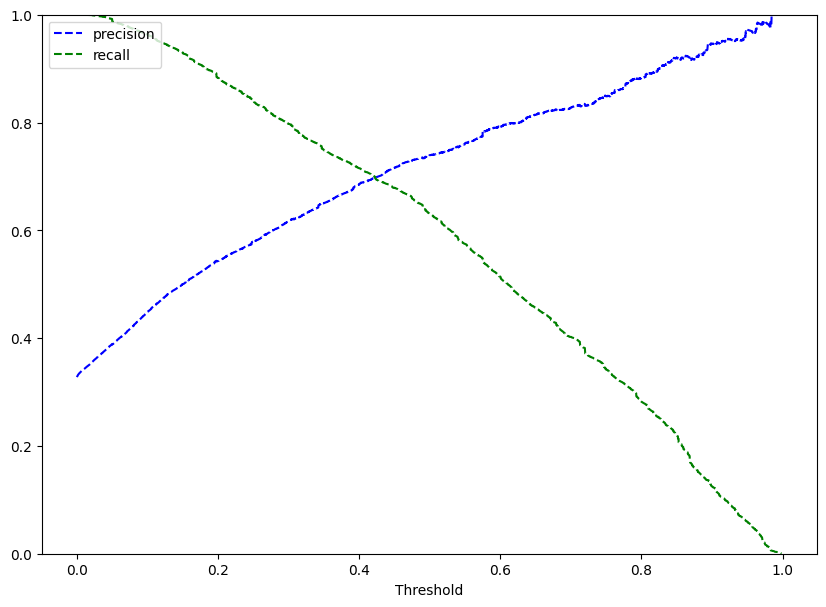

In [114]:
y_scores = lg6.predict(X_train6)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

- At the threshold of 0.42, we get balanced recall and precision.

In [115]:
optimal_threshold_curve = 0.42

**Checking model performance on training set**

In [116]:
pred_train6_opt_threshold2 = lg6.predict(X_train6) > optimal_threshold_curve

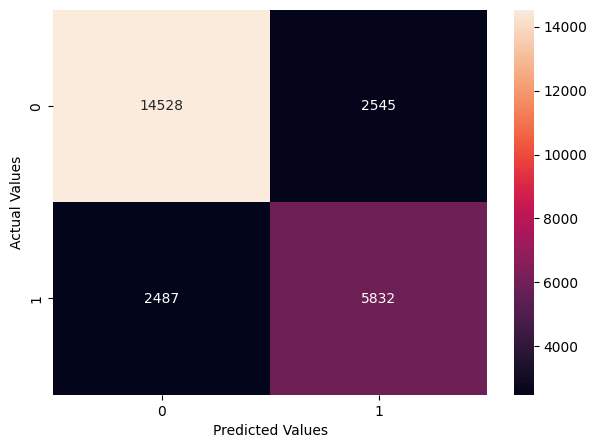

In [117]:
cm = confusion_matrix(y_train, pred_train6_opt_threshold2)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [118]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(lg6, X_train6, y_train, threshold=optimal_threshold_curve)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision       F1
0  0.801827  0.701046   0.696192  0.69861

- Model is performing well on training set.
- There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.42 as the optimal threshold.

**Checking model performance on test set**

In [119]:
pred_test6_opt_threshold2 = lg6.predict(X_test6) > optimal_threshold_curve

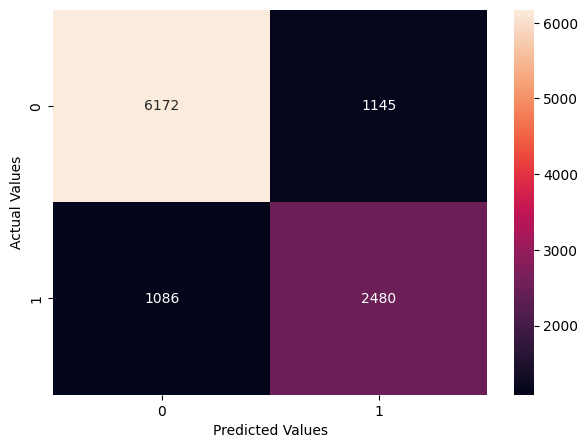

In [120]:
cm = confusion_matrix(y_test, pred_test6_opt_threshold2)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [121]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(lg6, X_test6, y_test, threshold=optimal_threshold_curve)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.795001  0.695457   0.684138  0.689751

- Recall and F1 of model has increased but the other metrics have reduced.
- Model is performing well on training set.
- There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.42 as the optimal threshold.

## Decision Tree Model Performance Improvement


### Decision Tree with restricted depth

**The Depth is restricted to 3**

In [122]:
dTree1 = DecisionTreeClassifier(criterion = 'gini',max_depth=3,random_state=1)
dTree1.fit(X_train.drop('const',axis=1), y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

#### Training Set performance for restricted depth model

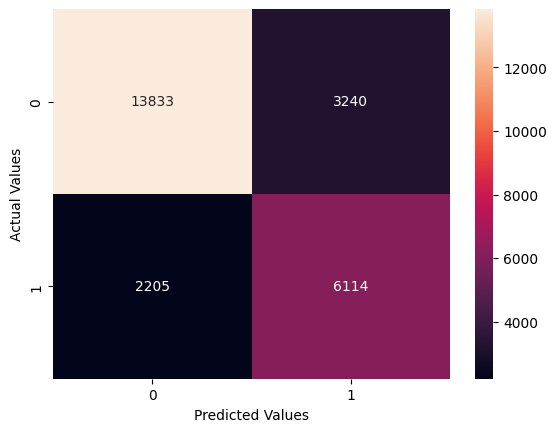

In [123]:
y_predict_train1 = dTree1.predict(X_train.drop('const', axis=1))
cm = confusion_matrix(y_train,y_predict_train1)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [124]:
decision_tree1_perf_train = model_performance_classification_sklearn(dTree1, X_train.drop('const',axis=1), y_train)
decision_tree1_perf_train

Accuracy    Recall  Precision        F1
0  0.785562  0.734944   0.653624  0.691903

- Recall on training set on default model is 0.985.

- Recall on training set on restricted depth model is 0.734.

-  Recall on training sets has reduced from 0.985 to 0.734 but this is an improvement because now the restricted depth model is not overfitting and we have a generalized model.

#### Testing Set performance for restricted depth model

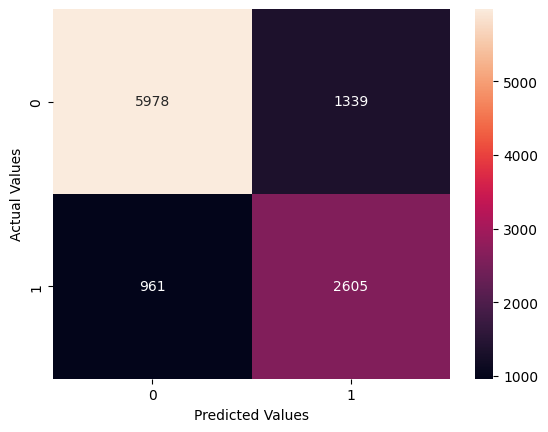

In [125]:
y_predict_test1 = dTree1.predict(X_test.drop('const', axis=1))
cm = confusion_matrix(y_test, y_predict_test1)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [126]:
decision_tree1_perf_test = model_performance_classification_sklearn(dTree1, X_test.drop('const',axis=1), y_test)
decision_tree1_perf_test

Accuracy   Recall  Precision        F1
0  0.788661  0.73051   0.660497  0.693742

- Recall on testing set on default model is 0.785.

- Recall on testing set on restricted depth model is 0.730.

-  Recall on testing sets has reduced from 0.785 to 0.730 but this is an improvement because now the restricted depth model is not overfitting and we have a generalized model.

#### Visualizing the Restricted model Decision Tree

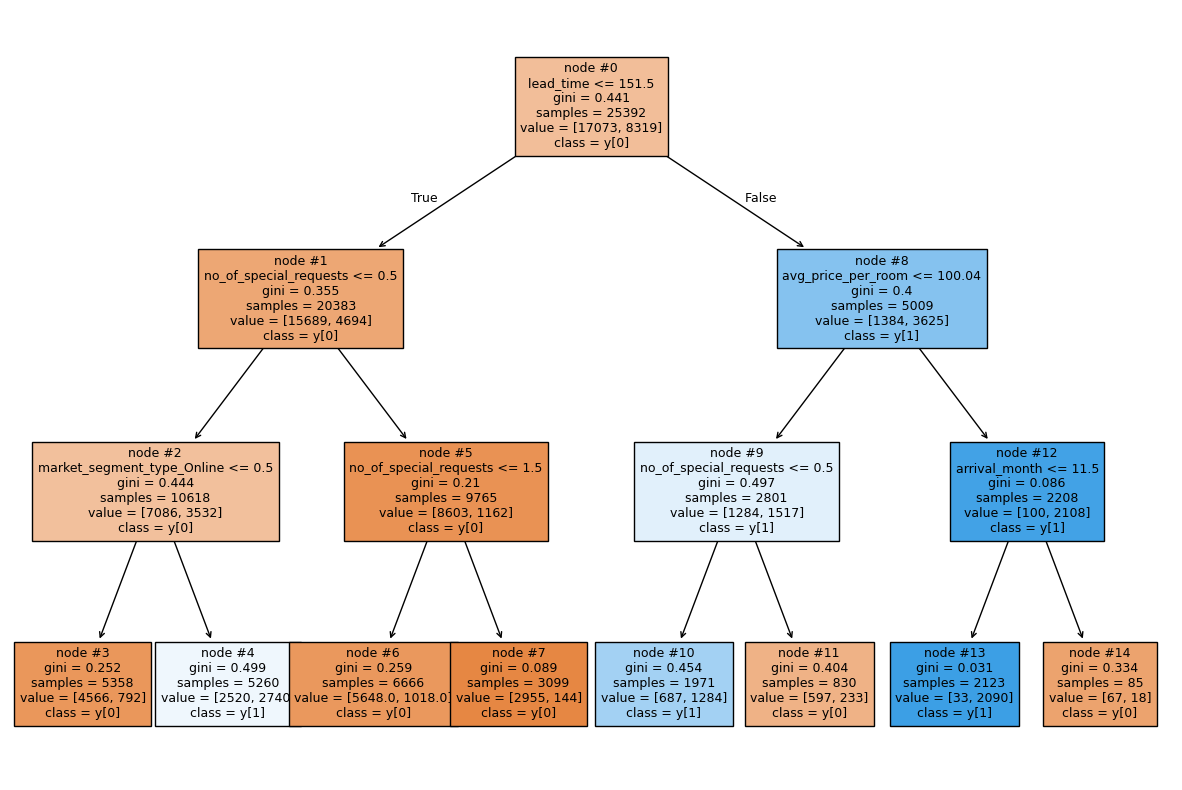

In [127]:
plt.figure(figsize=(15,10))

tree.plot_tree(dTree1,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [128]:
print(tree.export_text(dTree1,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4566.00, 792.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2520.00, 2740.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- no_of_special_requests <= 1.50
|   |   |   |--- weights: [5648.00, 1018.00] class: 0
|   |   |--- no_of_special_requests >  1.50
|   |   |   |--- weights: [2955.00, 144.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- no_of_special_requests <= 0.50
|   |   |   |--- weights: [687.00, 1284.00] class: 1
|   |   |--- no_of_special_requests >  0.50
|   |   |   |--- weights: [597.00, 233.00] class: 0
|   |--- avg_price_per_room >  100.04
|   |   |--- arrival_month <= 11.50
|   |   |   |--- weights: [33.00, 2090.00] class: 1
|   |   |--- arrival_month >  11.50
|   |   |   |--- weights: [67.00, 18.00] class: 0



In [129]:
print (pd.DataFrame(dTree1.feature_importances_, columns = ["Imp"]).set_index(pd.Index(feature_names)).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.503486
market_segment_type_Online            0.190039
no_of_special_requests                0.172994
avg_price_per_room                    0.108384
arrival_month                         0.025098
no_of_weekend_nights                  0.000000
no_of_children                        0.000000
no_of_adults                          0.000000
no_of_week_nights                     0.000000
room_type_reserved                    0.000000
required_car_parking_space            0.000000
type_of_meal_plan                     0.000000
repeated_guest                        0.000000
arrival_date                          0.000000
arrival_year                          0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
market_segment_type_Complementary     0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Offline           0.000000


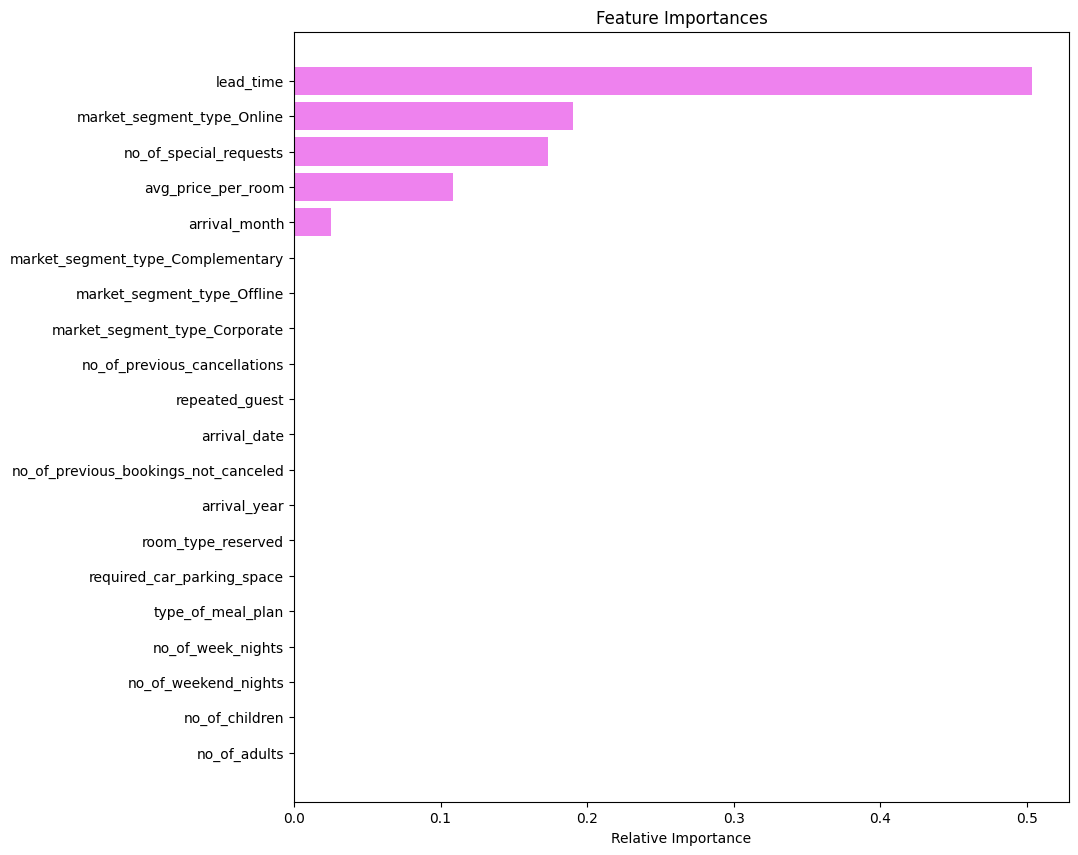

In [130]:
importances = dTree1.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

 - Important features of arrival_date, no_of_week_nights was on top in default model, but here importance of arrival_date and no_of_week_nights variable is zero
  this is the shortcoming of pre pruning, we just limit it even before knowing the importance of features and split.

- That's why we will go for pre pruning using grid search, maybe setting max_depth to 3 is not good enough.

- It is bad to have a very low depth because your model will underfit.

### Decision Tree Model (Pre-Pruning)

**we use GridSearchCV for Hyper parameter tuning for our Decision Tree Model.**

In [131]:
estimator = DecisionTreeClassifier(random_state=1)
parameters = {'max_depth': np.arange(1,10),'min_samples_leaf': [1, 2, 5, 7, 10,15,20],'max_leaf_nodes' : [2, 3, 5, 10],'min_impurity_decrease': [0.001,0.01,0.1]}
acc_scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train.drop('const',axis=1), y_train)
estimator = grid_obj.best_estimator_
estimator.fit(X_train.drop('const',axis=1), y_train)

DecisionTreeClassifier(max_depth=np.int64(3), max_leaf_nodes=5,
                       min_impurity_decrease=0.001, random_state=1)

#### Training Set perfromance for Decision Tree model(Pre-Pruning)

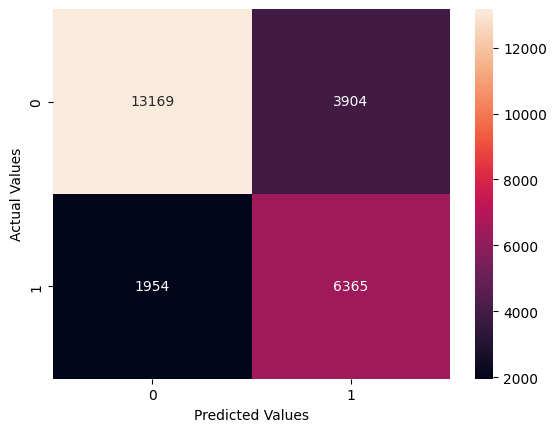

In [132]:
y_predict_train_tuned = estimator.predict(X_train.drop('const', axis=1))
cm = confusion_matrix(y_train, y_predict_train_tuned)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [133]:
decision_tree2_perf_train = model_performance_classification_sklearn(estimator, X_train.drop('const',axis=1), y_train)
decision_tree2_perf_train

Accuracy    Recall  Precision       F1
0  0.769297  0.765116   0.619827  0.68485

- Recall on training set on default model is 0.985.

- Recall on training set on restricted depth model is 0.765.

-  Recall on training sets has reduced from 0.985 to 0.765 but this is an improvement because now the Pre_pruning model is not overfitting and we have more generalized model.

#### Testing Set perfromance for Decision Tree model(Pre-Pruning)

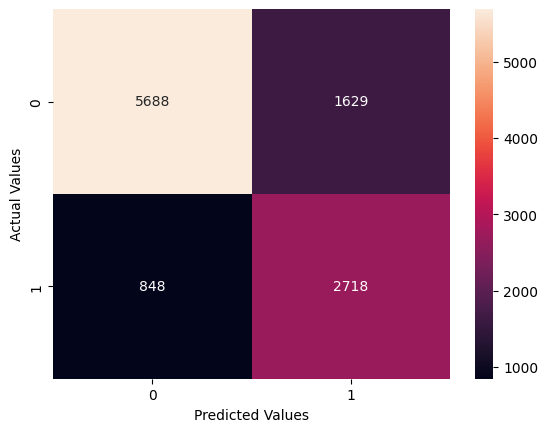

In [134]:
y_predict_test_tuned = estimator.predict(X_test.drop('const', axis=1))
cm = confusion_matrix(y_test, y_predict_test_tuned)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [135]:
decision_tree2_perf_test = model_performance_classification_sklearn(estimator, X_test.drop('const',axis=1), y_test)
decision_tree2_perf_test

Accuracy    Recall  Precision        F1
0  0.772397  0.762199   0.625259  0.686971

- Recall on testing set on default model is 0.785.

- Recall on testing set on restricted depth model is 0.762.

-  Recall on testing sets has reduced from 0.785 to 0.762 but this is an improvement because now the Pre_Pruning model is not overfitting and we have more generalized model.

#### Visualizing the Decision Tree model(Pre-Pruning)

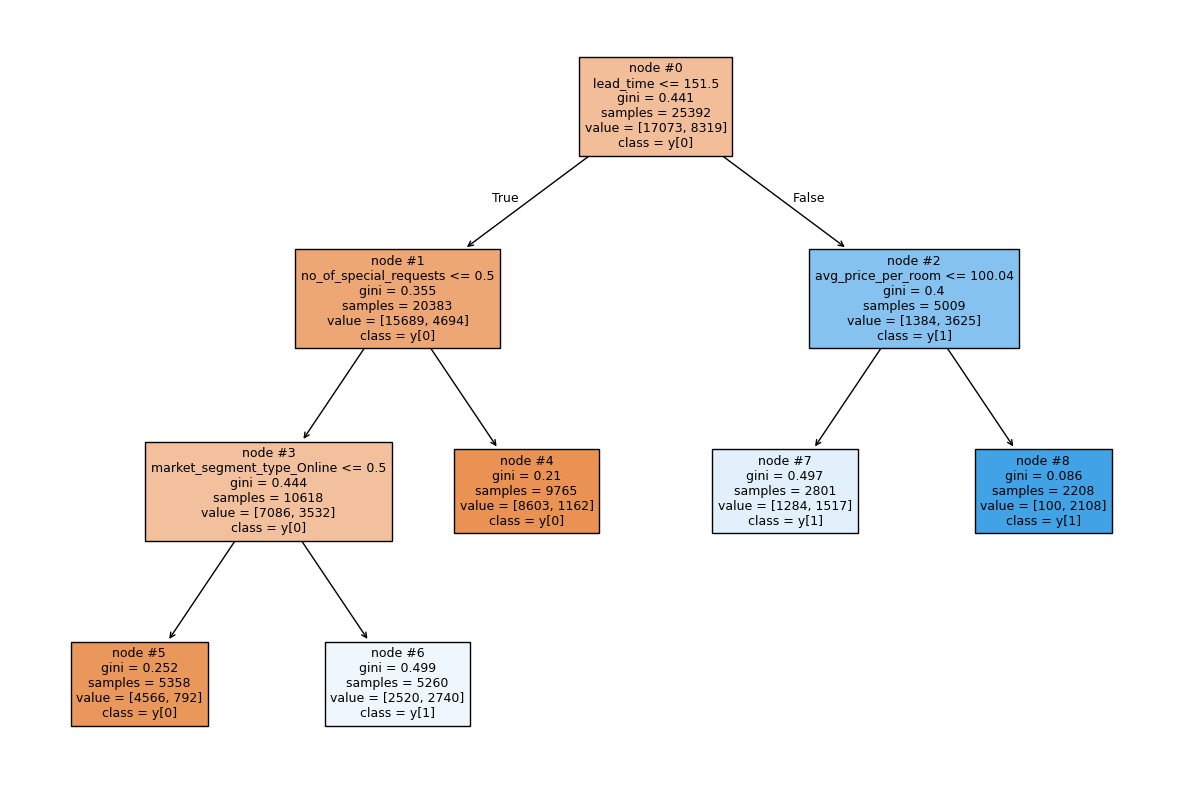

In [136]:
plt.figure(figsize=(15,10))
tree.plot_tree(estimator,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [137]:
print(tree.export_text(estimator,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- weights: [4566.00, 792.00] class: 0
|   |   |--- market_segment_type_Online >  0.50
|   |   |   |--- weights: [2520.00, 2740.00] class: 1
|   |--- no_of_special_requests >  0.50
|   |   |--- weights: [8603.00, 1162.00] class: 0
|--- lead_time >  151.50
|   |--- avg_price_per_room <= 100.04
|   |   |--- weights: [1284.00, 1517.00] class: 1
|   |--- avg_price_per_room >  100.04
|   |   |--- weights: [100.00, 2108.00] class: 1



In [138]:
print (pd.DataFrame(estimator.feature_importances_, columns = ["Imp"], index = feature_names).sort_values(by = 'Imp', ascending = False))

                                           Imp
lead_time                             0.546476
market_segment_type_Online            0.206265
no_of_special_requests                0.129621
avg_price_per_room                    0.117638
no_of_week_nights                     0.000000
no_of_weekend_nights                  0.000000
no_of_children                        0.000000
no_of_adults                          0.000000
arrival_year                          0.000000
type_of_meal_plan                     0.000000
required_car_parking_space            0.000000
room_type_reserved                    0.000000
repeated_guest                        0.000000
arrival_date                          0.000000
arrival_month                         0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
market_segment_type_Complementary     0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Offline           0.000000


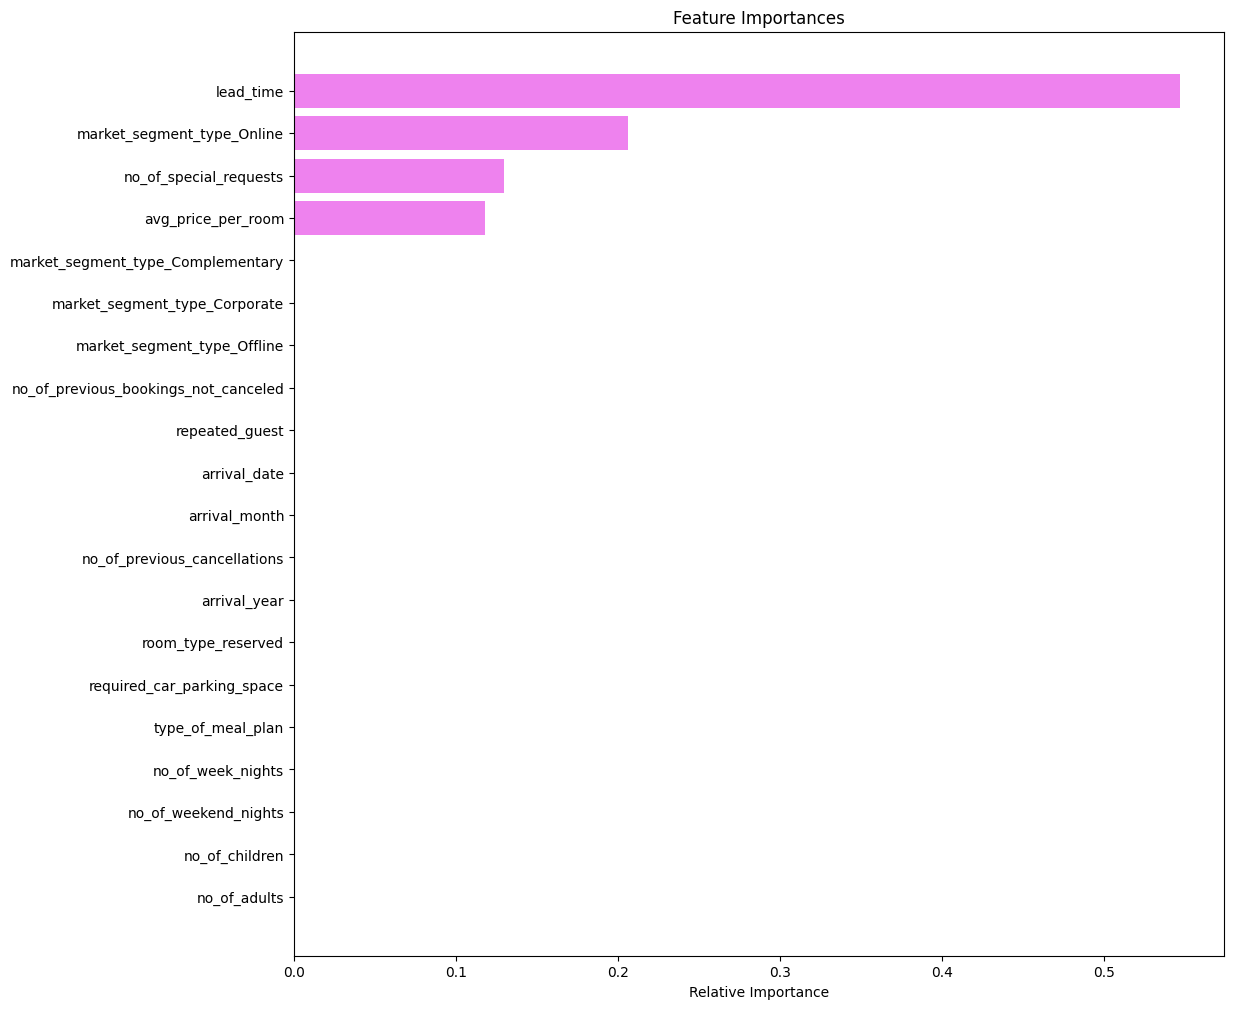

In [139]:
importances = estimator.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- You can see in important features of previous model is same but the Decision Tree of pre-pruned is the best than Depth limiting model.  
- This shows that hyperparameter tuning using Grid Search is better than randomly limiting a Hyperparameter

### Decision Tree Model(Post-Pruning)

**we use Cost Complexity Pruning method for Post-Pruning.**

In [140]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train.drop('const',axis=1), y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [141]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.007421
1     0.000000e+00    0.007421
2     2.206302e-07    0.007422
3     4.327745e-07    0.007422
4     7.032586e-07    0.007423
...            ...         ...
1358  7.146763e-03    0.286917
1359  1.256596e-02    0.299483
1360  1.659748e-02    0.316080
1361  2.369501e-02    0.363470
1362  7.710217e-02    0.440572

[1363 rows x 2 columns]

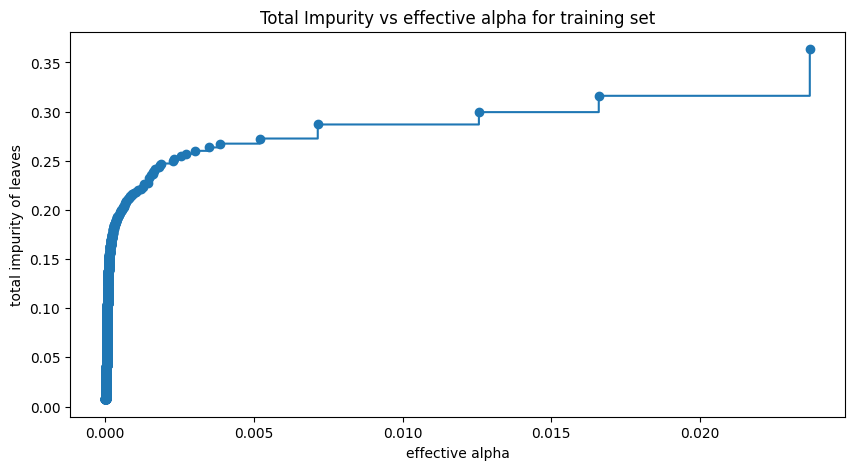

In [142]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel('total impurity of leaves')
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [143]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train.drop('const',axis=1), y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07710217431082483


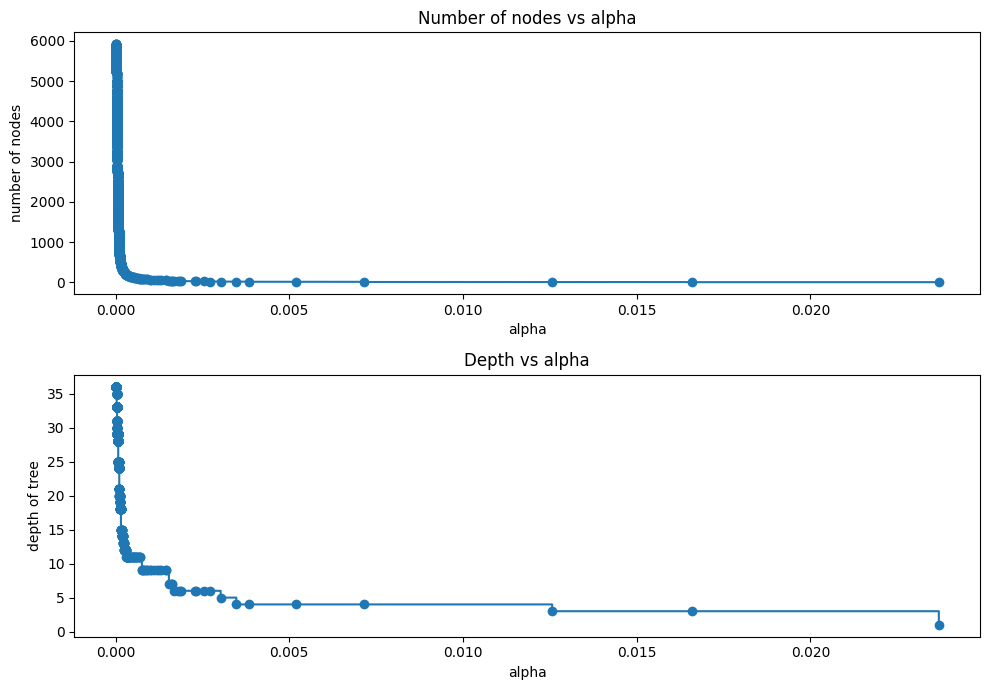

In [144]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('number of nodes')
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel('depth of tree')
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Accuracy vs alpha for training and testing sets


In [145]:
train_scores = [clf.score(X_train.drop('const', axis=1), y_train) for clf in clfs]
test_scores = [clf.score(X_test.drop('const', axis=1), y_test) for clf in clfs]

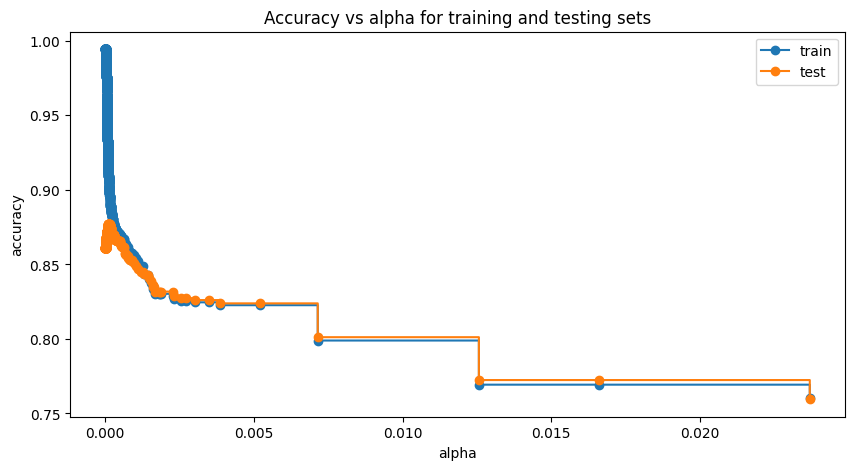

In [146]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [147]:
index_best_model = np.argmax(test_scores)
best_model = clfs[index_best_model]
print(best_model)
print('Training accuracy of best model: ',best_model.score(X_train.drop('const', axis=1), y_train))
print('Test accuracy of best model: ',best_model.score(X_test.drop('const', axis=1), y_test))

DecisionTreeClassifier(ccp_alpha=np.float64(0.00012110113421550094),
                       random_state=1)
Training accuracy of best model:  0.902882797731569
Test accuracy of best model:  0.8774235045483783


 Since accuracy isn't the right metric for our data we would want high recall

#### Recall vs alpha for training and testing sets


In [148]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train.drop('const', axis=1))
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

In [149]:
recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test.drop('const', axis=1))
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)

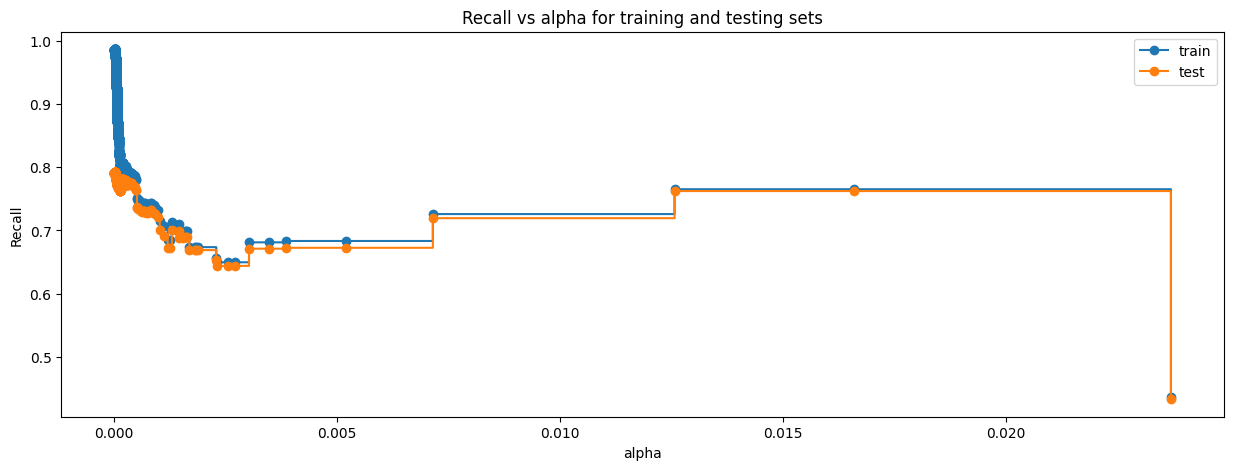

In [150]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel('alpha')
ax.set_ylabel('Recall')
ax.set_title('Recall vs alpha for training and testing sets')
ax.plot(ccp_alphas, recall_train, marker='o', label='train',
        drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label='test',
        drawstyle="steps-post")
ax.legend()
plt.show()

In [151]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print('Best model:',best_model)
print('Training accuracy of best model:',recall_train[index_best_model])
print('Testing accuracy of best model:',recall_test[index_best_model])

Best model: DecisionTreeClassifier(ccp_alpha=np.float64(2.5004750902671514e-05),
                       random_state=1)
Training accuracy of best model: 0.9842529150138237
Testing accuracy of best model: 0.7916432978126753


#### Testing set performance of Decision Tree(Post-Pruning)

In [152]:
decision_tree3_perf_train = model_performance_classification_sklearn(best_model, X_train.drop('const',axis=1), y_train)
decision_tree3_perf_train

Accuracy    Recall  Precision        F1
0  0.993187  0.984253   0.994897  0.989546

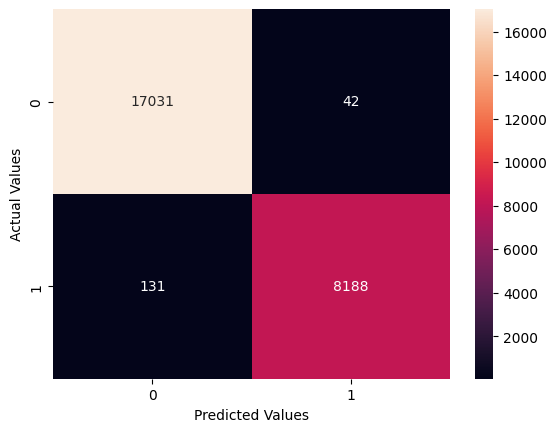

In [168]:
y_pred_train_best_model = best_model.predict(X_train.drop('const', axis=1))
cm = confusion_matrix(y_train, y_pred_train_best_model)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#### Testing set performance of Decision Tree(Post-Pruning)

In [153]:
decision_tree3_perf_test = model_performance_classification_sklearn(best_model, X_test.drop('const',axis=1), y_test)
decision_tree3_perf_test

Accuracy    Recall  Precision       F1
0  0.861619  0.791643   0.787228  0.78943

####  Confusion Matrix - post-pruned decision tree

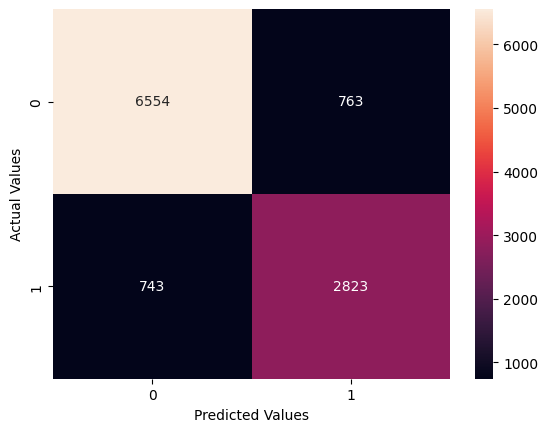

In [169]:
y_pred_test_best_model = best_model.predict(X_test.drop('const', axis=1))
cm = confusion_matrix(y_test, y_pred_test_best_model)
sns.heatmap(cm,annot=True,fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

#### Visualization of Decision Tree(Post-Pruning)

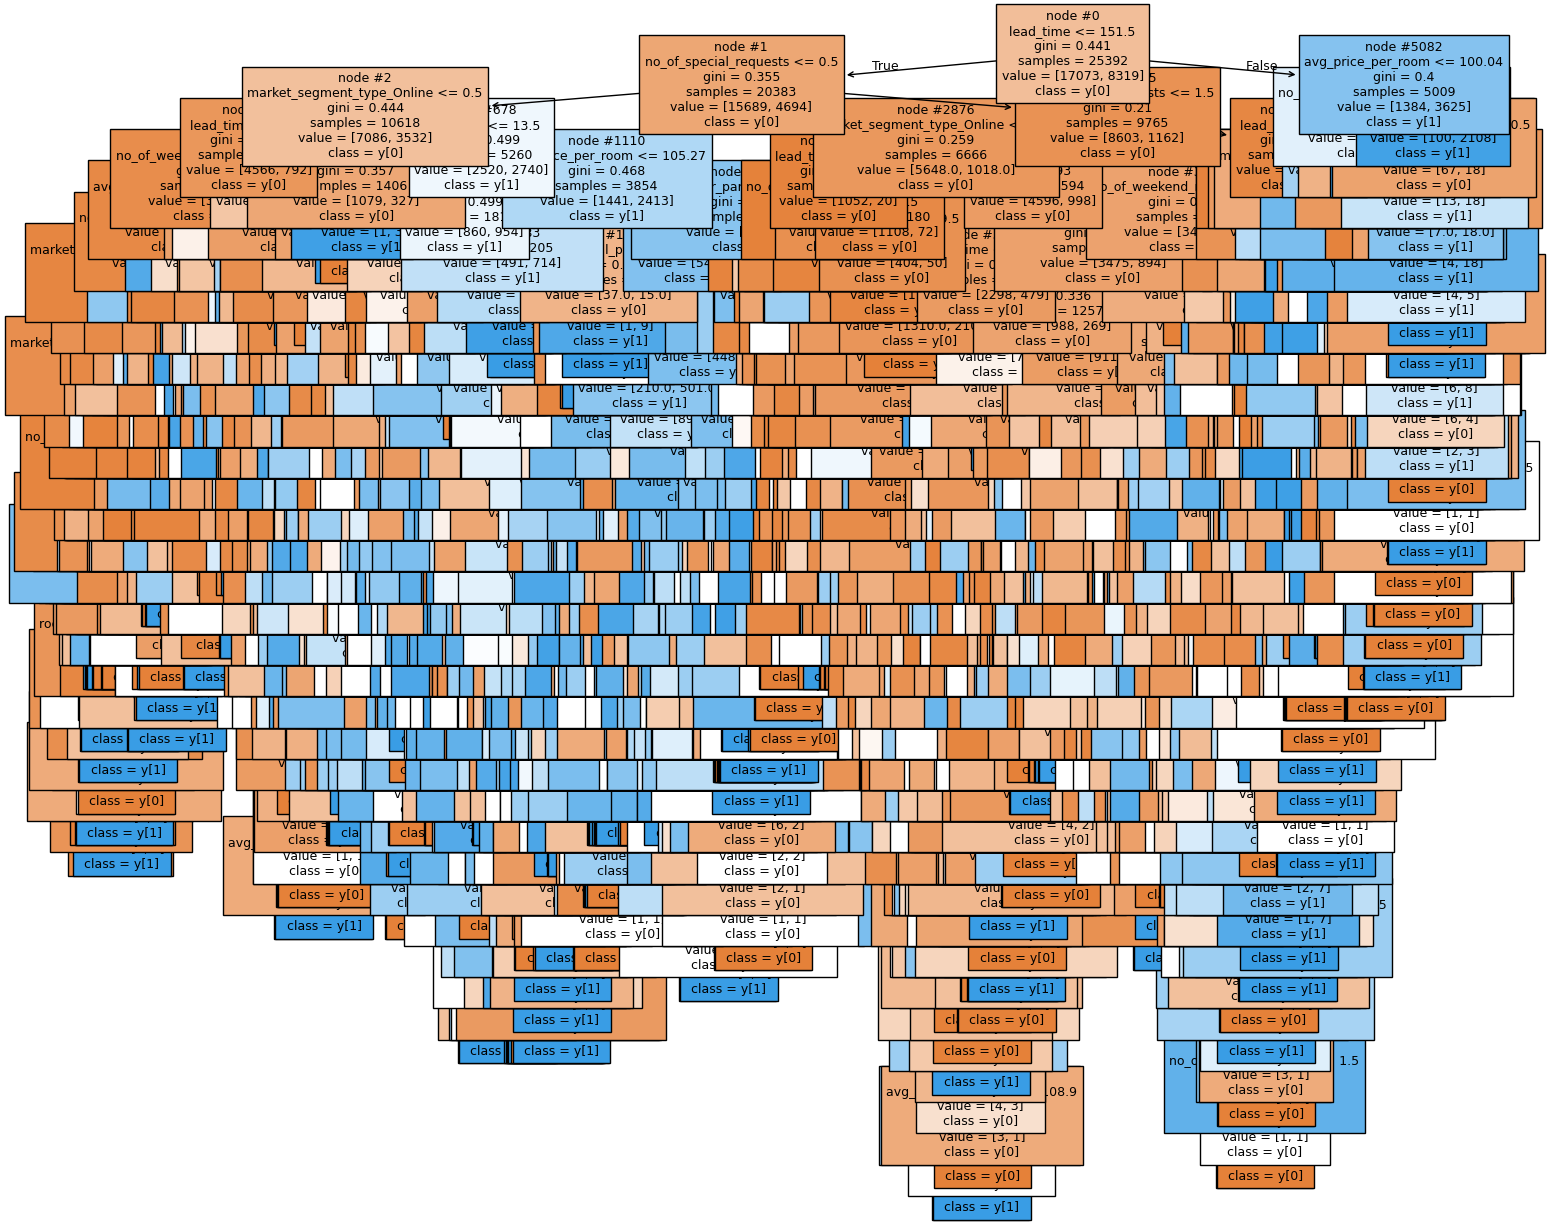

In [155]:
plt.figure(figsize=(17,15))
tree.plot_tree(best_model,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [156]:
print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- lead_time <= 151.50
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time <= 90.50
|   |   |   |   |--- no_of_weekend_nights <= 1.50
|   |   |   |   |   |--- avg_price_per_room <= 202.00
|   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Offline <= 0.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 88.60
|   |   |   |   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [73.00, 0.00] class: 0
|   |   |   |   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 15
|   |   |   |   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [150.00, 0.00] class: 0
|   |   |   |   |   |   

In [157]:
pd.DataFrame(best_model.feature_importances_, columns = ['Imp'], index = feature_names).sort_values(by = 'Imp', ascending = False)

Imp
lead_time                             0.346710
avg_price_per_room                    0.175029
market_segment_type_Online            0.087476
arrival_date                          0.083405
no_of_special_requests                0.071745
arrival_month                         0.069930
no_of_week_nights                     0.045850
no_of_adults                          0.034507
no_of_weekend_nights                  0.032606
arrival_year                          0.014552
type_of_meal_plan                     0.012460
room_type_reserved                    0.008720
required_car_parking_space            0.006734
no_of_children                        0.005017
market_segment_type_Offline           0.002537
market_segment_type_Corporate         0.001806
no_of_previous_bookings_not_canceled  0.000659
repeated_guest                        0.000256
no_of_previous_cancellations          0.000000
market_segment_type_Complementary     0.000000

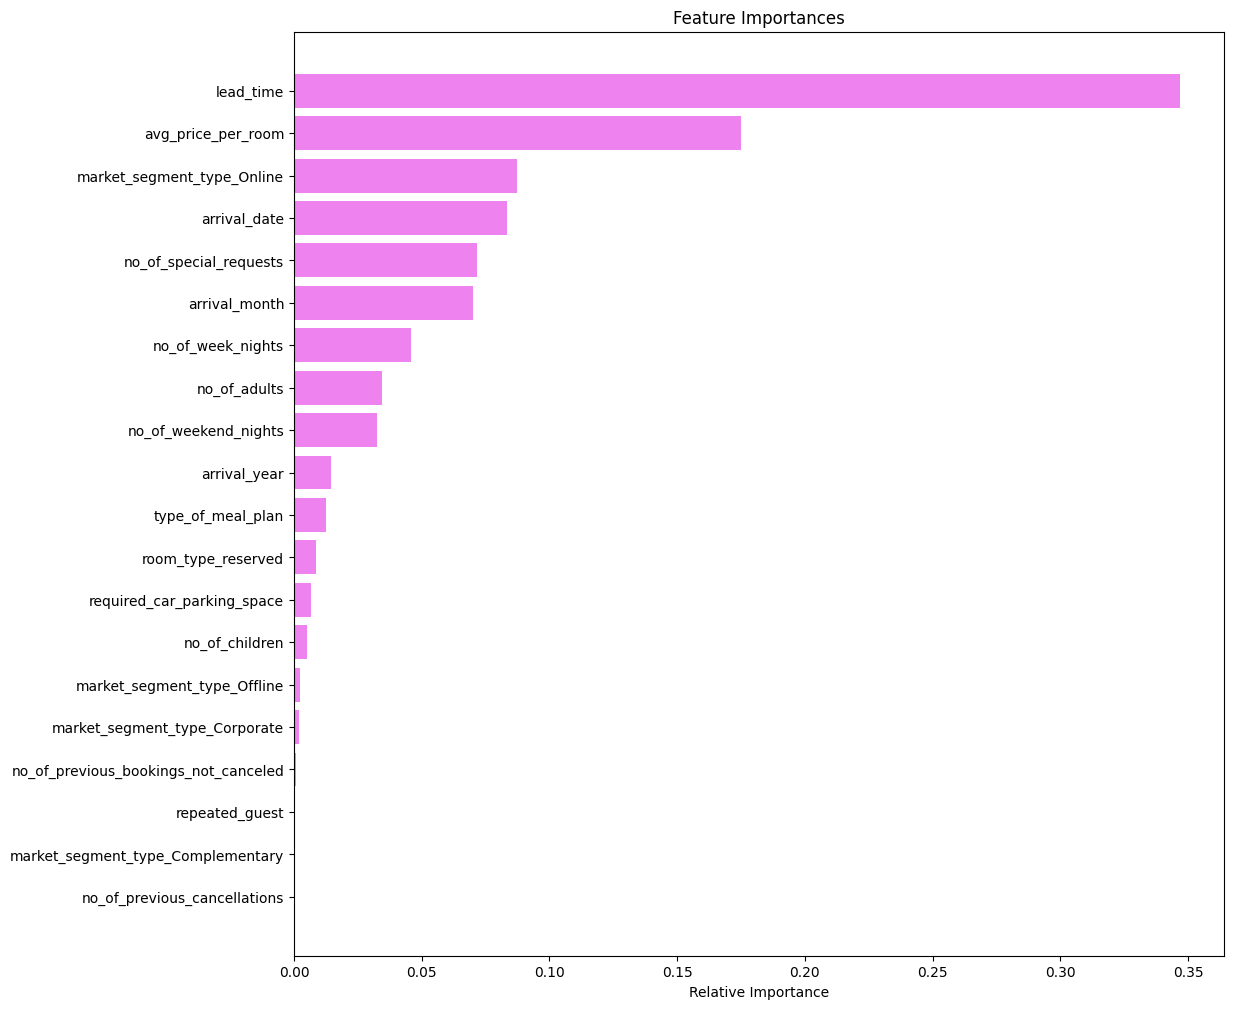

In [158]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Most the features are captured in the Post-Pruning model showing the significance of features in predicting the dependent variable.

# Model Performance Comparison and Final Model Selection

## Training set performance comparision

In [159]:


models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
        decision_tree_perf_train_without_pruning.T,
        decision_tree1_perf_train.T,
        decision_tree2_perf_train.T,
        decision_tree3_perf_train.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    'Logistic Regression-default Threshold (0.5)',
    'Logistic Regression-0.30 Threshold',
    'Logistic Regression-0.42 Threshold',
    'Decision Tree-without_Pruning',
    'Decision Tree with Restricted Depth to 3',
    'Decision Tree with Pre-Pruning',
    'Decision Tree with Post-Pruing'

]

print('Training performance comparison:')
models_train_comp_df

Training performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.806278   
Recall                                        0.630965   
Precision                                     0.739504   
F1                                            0.680937   

           Logistic Regression-0.30 Threshold  \
Accuracy                             0.773157   
Recall                               0.795288   
Precision                            0.619882   
F1                                   0.696714   

           Logistic Regression-0.42 Threshold  Decision Tree-without_Pruning  \
Accuracy                             0.801827                       0.994368   
Recall                               0.701046                       0.985695   
Precision                            0.696192                       0.997082   
F1                                   0.698610                       0.991356   

           Decision Tree with Restricted Depth to 3  \
Accuracy                                   0.785562   
Recall                                     0.734944   
Precision                                  0.653624   
F1                                         0.691903   

           Decision Tree with Pre-Pruning  Decision Tree with Post-Pruing  
Accuracy                         0.769297                        0.993187  
Recall                           0.765116                        0.984253  
Precision                        0.619827                        0.994897  
F1                               0.684850                        0.989546

## Testing set performance comparision

In [160]:


models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
        decision_tree_perf_test_without_pruning.T,
        decision_tree1_perf_test.T,
        decision_tree2_perf_test.T,
        decision_tree3_perf_test.T

    ],
    axis=1,
)
models_test_comp_df.columns = [
   'Logistic Regression-default Threshold (0.5)',
    'Logistic Regression-0.30 Threshold',
    'Logistic Regression-0.42 Threshold',
    'Decision Tree-without_Pruning',
    'Decision Tree with Restricted Depth to 3',
    'Decision Tree with Pre-Pruning',
    'Decision Tree with Post-Pruing'

]

print('Testing performance comparison:')
models_test_comp_df

Testing performance comparison:


Logistic Regression-default Threshold (0.5)  \
Accuracy                                      0.801617   
Recall                                        0.620864   
Precision                                     0.732870   
F1                                            0.672233   

           Logistic Regression-0.30 Threshold  \
Accuracy                             0.771570   
Recall                               0.795289   
Precision                            0.617596   
F1                                   0.695268   

           Logistic Regression-0.42 Threshold  Decision Tree-without_Pruning  \
Accuracy                             0.795001                       0.861068   
Recall                               0.695457                       0.790802   
Precision                            0.684138                       0.786392   
F1                                   0.689751                       0.788591   

           Decision Tree with Restricted Depth to 3  \
Accuracy                                   0.788661   
Recall                                     0.730510   
Precision                                  0.660497   
F1                                         0.693742   

           Decision Tree with Pre-Pruning  Decision Tree with Post-Pruing  
Accuracy                         0.772397                        0.861619  
Recall                           0.762199                        0.791643  
Precision                        0.625259                        0.787228  
F1                               0.686971                        0.789430

- Almost all the models are performing well on both training and test data without the problem of overfitting.
- The Decision Tree model with Post-Pruning is giving the best F1 score. Therefore it can be selected as the final model.
